# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

```
!python3.10 -m venv venv
.\venv\Scripts\activate
En el notebook seleccionar el kernel de esta ambiente
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

<h1 style="color: blue;">RECOLECCION DE DATOS</h1>


## Cargar los datos

### Utilizando el paquete palmerpenguins

Este paquete está diseñado principalmente para fines educativos y de demostración de técnicas de análisis de datos.El paquete proporciona un conjunto de datos sencillo pero rico en información sobre tres especies de pingüinos: Adelie, Chinstrap y Gentoo, recolectados en tres islas de la región antártica. Contiene características como la longitud del pico, la profundidad del pico, la longitud de las aletas, el peso corporal, el sexo y la isla de origen de cada pingüino.  
**Descripción:** Proporciona la versión cruda y sin procesar del conjunto de datos, tal como fue recolectada.  
**Características:**  
- Nombres de columnas menos amigables y más técnicos.
- Las unidades de medida pueden no estar claramente indicadas.
- Puede haber valores que necesiten ajustes (por ejemplo, errores tipográficos, inconsistencias en categorías).
- Contiene datos adicionales que no están en load_penguins() (potencialmente ruido o datos irrelevantes).  

**Uso principal:** Ideal para trabajos avanzados en los que quieras replicar el proceso de limpieza desde cero.

Datos crudos

In [3]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


Datos previamente procesados

La función palmerpenguins.load_penguins() del paquete palmerpenguins carga el conjunto de datos de los pingüinos directamente en un formato de DataFrame de pandas. Este conjunto de datos contiene información sobre tres especies de pingüinos en la región antártica: Adelie, Chinstrap y Gentoo.
**Descripción:** Proporciona una versión procesada y limpia del conjunto de datos.  
**Características:**  
- Las columnas tienen nombres amigables y legibles.
- Las unidades están claras (por ejemplo, milímetros y gramos).
- Algunas categorías (como especies o islas) están simplificadas.
- Datos estructurados como un DataFrame de pandas.
- Contiene los valores faltantes (NaN) para reflejar la realidad de los datos, pero organizados para facilitar su análisis.

**Uso principal:** Ideal para análisis exploratorios y aprendizaje básico de preprocesamiento.

In [4]:
preprocessed_penguins_df = palmerpenguins.load_penguins()
preprocessed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Utilizando los conjuntos de datos de seaborn

In [5]:
preprocessed_penguins_df = sns.load_dataset("penguins")

### Utilizando conjuntos de datos de un dataset.csv

- Conjunto de datos crudos.

La función pd.read_csv de la biblioteca pandas se utiliza para leer archivos CSV (Comma-Separated Values) y convertirlos en un DataFrame, que es una estructura tabular de datos muy utilizada en Python para análisis y manipulación.

In [6]:
raw_penguins_df2 = pd.read_csv('penguins_raw.csv')
raw_penguins_df2

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


- Conjunto de datos previamente procesados.

In [7]:
preprocessed_penguins_df2 = pd.read_csv('penguins.csv')
preprocessed_penguins_df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009



<h1 style="color: blue;">ANALISIS TIPO VARIABLES, LIMPIEZA Y VALIDACION</h1>

## ¿Qué tipo de dato son las variables del conjunto de datos?

El atributo dtypes en un DataFrame de pandas se utiliza para inspeccionar los tipos de datos de cada columna. 

In [8]:
preprocessed_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

preprocessed_penguins_df.dtypes.value_counts()

Este codigo lo que hace es obtener un resumen de cuántas columnas en el DataFrame, ya que cuenta cuántas veces aparece cada tipo de dato en la serie obtenida.

In [9]:
preprocessed_penguins_df.dtypes.value_counts()

float64    4
object     3
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

El atributo shape de un DataFrame de pandas devuelve las dimensiones del DataFrame en forma de una  
 tupla: (filas, columnas)

In [10]:
preprocessed_penguins_df.shape

(344, 7)

## ¿Existen valores nulos explicitos en el conjunto de datos?

preprocessed_penguins_df.isnull().any() detecta la presencia de valores nulos (NaN) en cada columna del DataFrame. 

preprocessed_penguins_df.isnull():
Devuelve un DataFrame del mismo tamaño que el original, pero con valores booleanos:
- True donde haya valores nulos (NaN).
- False donde no haya valores nulos.  

.any():
Se aplica a cada columna y devuelve True si algún valor es nulo en esa columna.
Si no hay valores nulos en una columna, devuelve False.

In [11]:
preprocessed_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

preprocessed_penguins_df.isnull().sum().sort_values(ascending=False)  
sirve para identificar cuántos valores nulos (NaN) hay en cada columna del DataFrame y ordenarlos de mayor a menor cantidad.

In [12]:
preprocessed_penguins_df.isnull().sum().sort_values(ascending=False)

sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

preprocessed_penguins_df.isnull().sum().sum() sirve para calcular el número total de valores nulos (NaN) en todo el DataFrame.

In [13]:
preprocessed_penguins_df.isnull().sum().sum()


19

## ¿Cuál es la proporción de valores nulos por cada variable?

Desglose del código  

preprocessed_penguins_df.isnull():  
Genera un DataFrame booleano donde,  
True: indica que un valor es nulo (NaN).  
False: indica que no es nulo.
Ejemplo:

| Species | Bill Length (mm) | Sex   |
|---------|-------------------|-------|
| False   | False            | False |
| False   | True             | False |
| False   | False            | True  |
 

.melt(value_name='missing'):
Convierte el DataFrame de formato ancho a formato largo(o derretido).  
Cada columna se convierte en una fila con dos columnas:
- variable: nombre de la columna original.
- missing: valores de True o False (si el valor es nulo o no).
Ejemplo tras aplicar .melt():

| Variable        | Missing |
|-----------------|---------|
| species         | False   |
| bill_length_mm  | False   |
| sex             | False   |
| species         | False   |
| bill_length_mm  | True    |
| sex             | False   |
| species         | False   |
| bill_length_mm  | False   |
| sex             | True    |    

.pipe(lambda df: (...)):

pipe se utiliza para encadenar operaciones. La función lambda recibe el DataFrame derretido como df y lo utiliza como entrada para el siguiente paso (la visualización con Seaborn).  

sns.displot(...):

data=df: usa el DataFrame generado en pasos anteriores.  
y='variable': coloca el nombre de las columnas originales (variable) en el eje Y.  
hue='missing': colorea según si los valores son True (nulos) o False (no nulos).  
multiple='fill': normaliza las barras para que muestren proporciones (porcentaje de valores nulos y no nulos).  
aspect=2: ajusta la relación de aspecto del gráfico para hacerlo más ancho.  

Propósito del código  

Este código produce un gráfico de barras apiladas normalizadas para visualizar la proporción de valores nulos (NaN) y no nulos en cada columna del DataFrame.

Salida esperada
Un gráfico generado por Seaborn con:

El eje Y mostrando los nombres de las columnas (variable).
Las barras divididas por colores:
Un color para valores no nulos (False).
Otro color para valores nulos (True).
Las barras escaladas como proporciones (suma = 1 para cada fila).

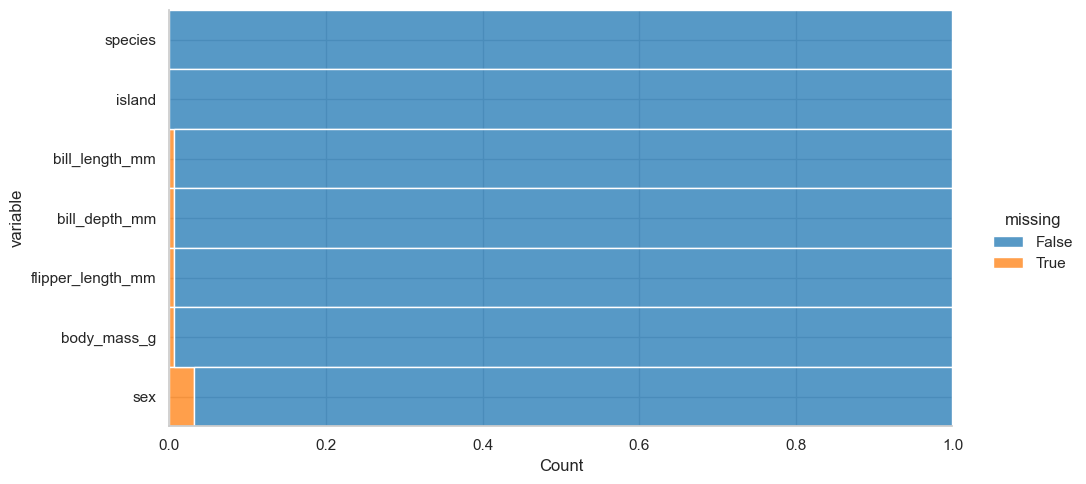

In [14]:
(
    preprocessed_penguins_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

### Explicación  
preprocessed_penguins_df.isnull().transpose().pipe(lambda df: sns.heatmap(data=df))

### 1. `preprocessed_penguins_df.isnull()`

**Descripción:**

Este método genera un DataFrame booleano del mismo tamaño que `preprocessed_penguins_df`, donde:
- `True` indica que el valor es **nulo** (`NaN`).
- `False` indica que el valor **no es nulo**.

**Ejemplo:**

| species | bill_length_mm | sex   |
|---------|----------------|-------|
| False   | False          | False |
| False   | True           | False |
| False   | False          | True  |

---

### 2. `.transpose()`

**Descripción:**

El método **`transpose()`** invierte las filas y columnas del DataFrame. Las **columnas** originales se convierten en **filas**, y las **filas** originales se convierten en **columnas**.

**Ejemplo:**  
Después de transponer el DataFrame, tendrás:

| species        | False | False | False |
|----------------|-------|-------|-------|
| bill_length_mm | False | True  | False |
| sex            | False | False | True  |

---

### 3. `.pipe(lambda df: sns.heatmap(data=df))`

**Descripción:**

- **`pipe()`**: Se utiliza para encadenar operaciones, pasando el DataFrame transpuesto a la siguiente función (**`sns.heatmap()`**).
- **`sns.heatmap(data=df)`**: Genera un mapa de calor para visualizar la distribución de los valores nulos:
  - Los valores **`True`** (nulos) se muestran con un color oscuro.
  - Los valores **`False`** (no nulos) se muestran con un color claro.

Estos nos muestra en el eje x los 344 pinguinos. Con lo cual podemos ver como dos de los pinguinos tiene una linea blanca bastamte alta, es decir que hay un pinguino con bastantes datos nulos. 

<AxesSubplot: >

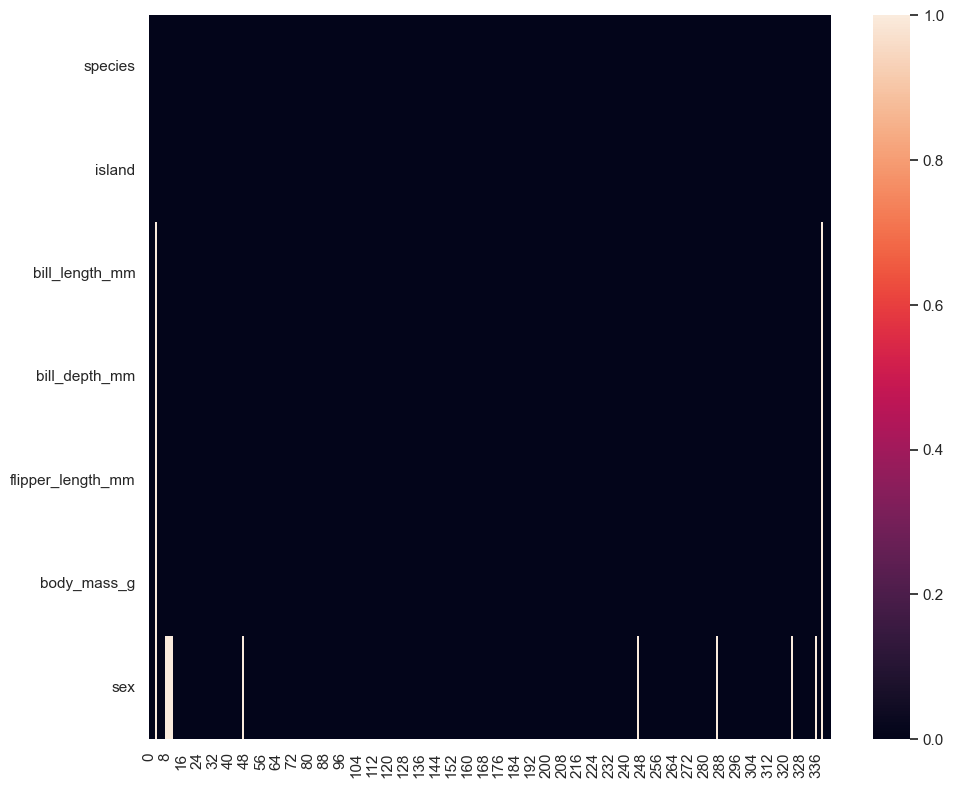

In [15]:
preprocessed_penguins_df.isnull().transpose().pipe(lambda df: sns.heatmap(data=df))

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?


La decisión de **eliminar** o **mantener** los valores nulos depende de varios factores y del contexto del análisis. Aquí se presentan los principales criterios que debes considerar:

---

### 1. **Porcentaje de valores nulos**
   - **Si una columna tiene un alto porcentaje de valores nulos**, puedes considerar eliminarla. Por ejemplo, si más del **50%** de los valores son nulos, probablemente no aportará información útil.
   - Puedes calcular el porcentaje de valores nulos en cada columna con el siguiente código:

     ```python
     preprocessed_penguins_df.isnull().mean() * 100
     ```

   - Si el porcentaje de valores nulos es bajo, puedes optar por imputarlos o dejarlos como están.

---

### 2. **Impacto de eliminar los valores nulos**
   - **Eliminar filas con valores nulos** puede reducir significativamente el tamaño de tu conjunto de datos, lo que podría afectar el rendimiento del modelo si las filas eliminadas son muchas.
   - **Eliminar columnas con valores nulos** puede ser útil si esas columnas no aportan valor, o si son demasiado problemáticas para ser imputadas de forma confiable.

---

### 3. **Tipo de variable**
   - **Para variables numéricas**: Si los valores nulos son pocos, puedes **imputarlos** con la **media**, **mediana** o **moda**, dependiendo de la distribución de los datos.
   - **Para variables categóricas**: Si los valores nulos son pocos, puedes **rellenarlos** con la categoría más frecuente (moda), o si los nulos son demasiado frecuentes, podrías eliminarlos.

---

### 4. **Método de imputación**
   - Si no deseas perder datos, puedes optar por **imputar** los valores nulos en lugar de eliminarlos. Algunas estrategias comunes son:
     - **Imputación con la media**, **mediana** o **moda**.
     - **Imputación con modelos predictivos** como regresión o **k-NN** para predecir los valores nulos basados en otras variables.

---

### 5. **Dependencia del modelo**
   - Algunos modelos (como **Árboles de Decisión**, **Random Forest**, **XGBoost**) pueden manejar valores nulos de forma automática durante el entrenamiento.
   - Otros modelos (como **Regresión Lineal**, **k-NN**) requieren que los valores nulos sean manejados explícitamente, ya sea eliminando las filas/columnas o imputando los valores.

---

### 6. **Objetivo del análisis**
   - Si el análisis es exploratorio, puedes **imputar** los valores nulos para no perder información valiosa.
   - Si el objetivo es construir un modelo predictivo de alta precisión, puede ser más adecuado **eliminar los nulos** o usar un enfoque de imputación más sofisticado.

---

### 7. **Correlación con otras variables**
   - Si los valores nulos están correlacionados con otras variables, esto podría indicar que los nulos tienen un significado especial, y en este caso, deberías **investigar más a fondo** antes de eliminar o imputar.
   - Si se puede, rellena los nulos con valores derivados de otras variables.

---

### Resumen de opciones:

| **Opción**                        | **Cuándo usarla**                                                                                  |
|------------------------------------|----------------------------------------------------------------------------------------------------|
| Eliminar columnas/filas con nulos  | Si la columna tiene muchos nulos (más del 50%) o si no aporta valor significativo.               |
| Imputar valores nulos             | Si los nulos son pocos y puedes reemplazarlos con valores representativos (media, mediana, moda).  |
| Dejar los nulos                   | Si el modelo o análisis puede manejar nulos sin perder rendimiento o si los nulos son significativos. |
| Rellenar con una categoría        | Si la variable es categórica y los valores nulos representan una categoría significativa.         |

---

dropna() elimina todas las filas del DataFrame que contienen al menos un valor nulo (NaN).  
Si una fila tiene un valor nulo en cualquier columna, esa fila será eliminada del DataFrame.  
Si no hay filas con valores nulos, el DataFrame no se modificará.  
En este caso, hay 11 filas que contienen valores nulos. Pasado de 344 a 333 filas.

In [16]:
processed_penguins_df = (
    preprocessed_penguins_df
    .dropna()
)

processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<h1 style="color: blue;">ANALISIS UNIVARIADO</h1>

# Explorando nuestras variables numericas y categoricas

### Para obtener algunos estadisticos de todas las variables

### Usamos `processed_penguins_df.describe(include='all')`

El método `describe()` en Pandas se utiliza para obtener un resumen estadístico del DataFrame, proporcionando información sobre la distribución y las características de las columnas numéricas y categóricas. Al pasar `include='all'` como parámetro, el método genera estadísticas tanto para las columnas numéricas como para las no numéricas (categóricas).

---

### 1. **`processed_penguins_df.describe()`**
   - Por defecto, `describe()` solo calcula estadísticas descriptivas para las **columnas numéricas**.
   - Para las columnas numéricas, proporciona información como:
     - **count**: Número de valores no nulos.
     - **mean**: Media de los valores.
     - **std**: Desviación estándar.
     - **min**: Valor mínimo.
     - **25%**: Primer cuartil (percentil 25).
     - **50%**: Mediana (percentil 50).
     - **75%**: Tercer cuartil (percentil 75).
     - **max**: Valor máximo.

---

### 2. **`processed_penguins_df.describe(include='all')`**
   - Al incluir `include='all'`, el método también calcula estadísticas para **columnas categóricas**.
   - Para las columnas categóricas, proporciona información como:
     - **count**: Número de valores no nulos.
     - **unique**: Número de categorías únicas en la columna.
     - **top**: La categoría más frecuente.
     - **freq**: Frecuencia de la categoría más frecuente.

---

### 3. **Ejemplo**
   Si tienes un DataFrame `processed_penguins_df` con columnas tanto numéricas como categóricas (por ejemplo, "species" y "bill_length_mm"), al usar `describe(include='all')`, obtendrás estadísticas para ambas, como se muestra en el siguiente ejemplo:

```python
processed_penguins_df.describe(include='all')

In [17]:
processed_penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


### Si queremos solo las numéricas

In [18]:
processed_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


## Tabulación

### 1. **¿Qué es la tabulación?**
   - Es el proceso de contar cuántas veces aparece cada valor único en una variable categórica.
   - Es una herramienta fundamental para el análisis exploratorio de datos, ya que proporciona una visión rápida de la composición de una columna o categoría.

---

### 2. **Ejemplo de tabulación**

Supongamos que tenemos una variable `species` con los siguientes datos:

| Variable: Species | 
|-------------------|
| Adelie            |
| Adelie            |
| Adelie            |
| Adelie            |
| Adelie            |
| Adelie            |
| Gentoo            |
| Gentoo            |
| Gentoo            |
| Gentoo            |
| Gentoo            |
| Chinstrap         |
| Chinstrap         |
| Chinstrap         |

El resultado de la **tabulación** sería:

| Species   | Count |
|-----------|-------|
| Adelie    | 6     |
| Gentoo    | 5     |
| Chinstrap | 3     |

---

### 3. **Representación gráfica**
   - La información tabulada puede representarse fácilmente en un gráfico de barras para visualizar la frecuencia de cada categoría.
   - En la imagen, el gráfico de barras muestra:
     - Adelie con una frecuencia de 6.
     - Gentoo con una frecuencia de 5.
     - Chinstrap con una frecuencia de 3.

### Si queremos solo categóricas v1

In [19]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


### Solo categóricas v2

Tambien podemos convertir object en un nombre personalizado como category

In [20]:
(
    processed_penguins_df
    .astype(
        {
            'species': 'category', #Convierte el tipo de Object a category
            'island': 'category',  #Convierte el tipo de Object a category
            'sex': 'category'      #Convierte el tipo de Object a category
        }
    )
    .describe(include=['category', object])
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


### Pandas (barras verticales)

<AxesSubplot: >

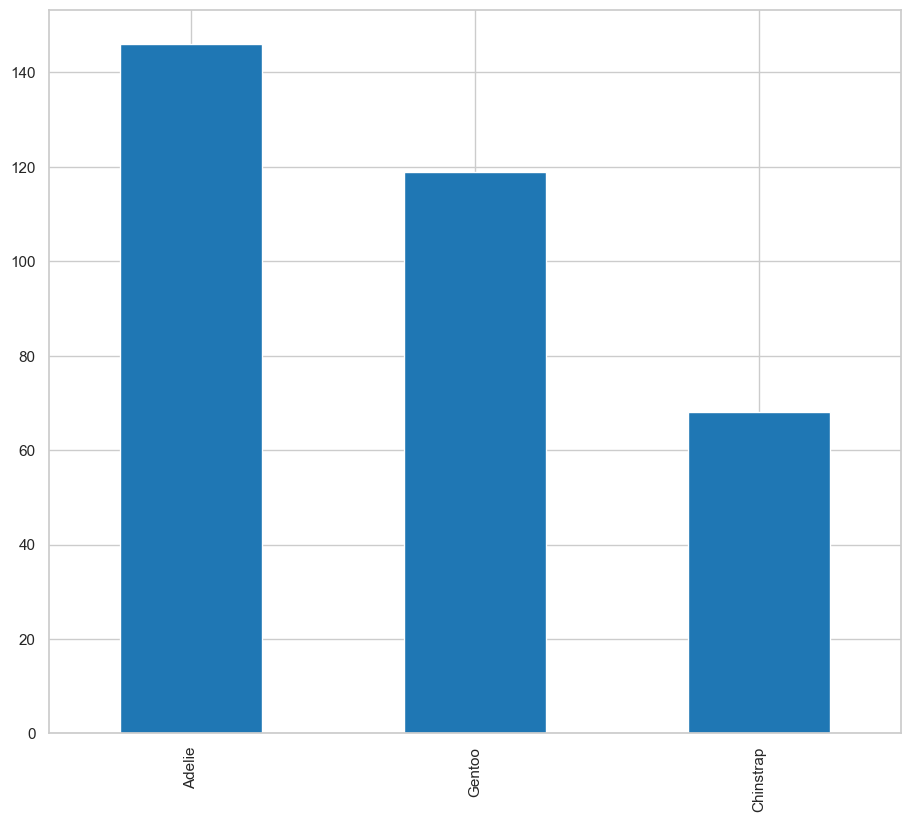

In [21]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar',
        # color=penguin_color.values()
    )
)

### Seaborn (barras verticales con catplot)

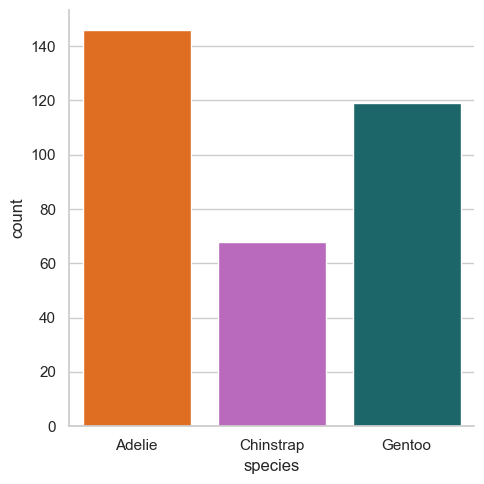

In [22]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color,
    # order=processed_penguins_df.value_counts('species', sort=True).index
)

## pandas y Seaborn (barras verticales con barplot) 

<AxesSubplot: xlabel='species', ylabel='count'>

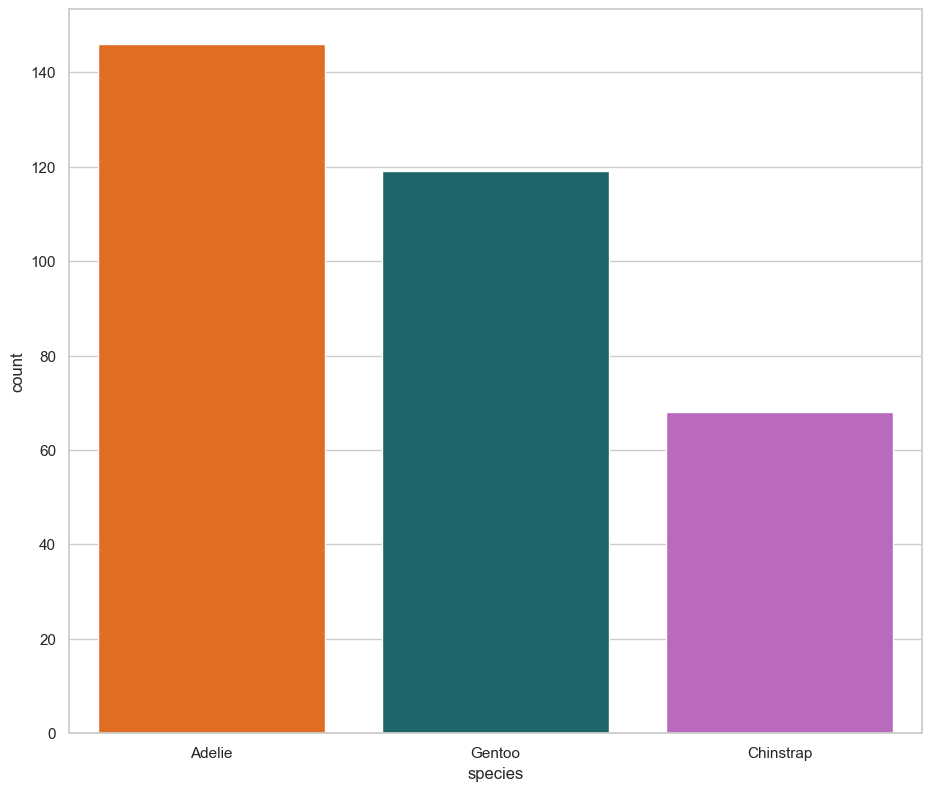

In [23]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color
            )
        )
    )
)

### ¿Cómo visualizar las proporciones?

## pandas y Seaborn (barras verticales con displot) 

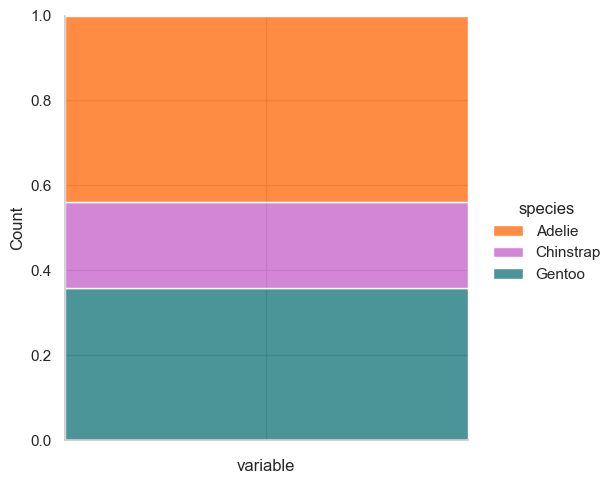

In [24]:
(
    processed_penguins_df
    .add_column('variable', '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
)

# Medidas de tendencia central
### ¿Qué son las medidas de tendencia central?

Las **medidas de tendencia central** son valores estadísticos que describen el punto central o promedio de un conjunto de datos. Estas medidas ayudan a resumir un conjunto de datos indicando dónde "tienden a concentrarse" los valores.

---

### Principales medidas de tendencia central

1. **Media**:
   - Es el promedio aritmético de los datos.
   - Se calcula sumando todos los valores y dividiéndolos por el número total de observaciones.
   - **Fórmula**:  
     \[
     \text{Media} = \frac{\sum_{i=1}^{n} x_i}{n}
     \]
   - **Ejemplo**: Si los datos son 2, 4, 6, la media es:
     \[
     \text{Media} = \frac{2 + 4 + 6}{3} = 4
     \]

2. **Mediana**:
   - Es el valor que divide el conjunto de datos en dos partes iguales, cuando los datos están ordenados de menor a mayor.
   - Si el número de observaciones es impar, es el valor central; si es par, es el promedio de los dos valores centrales.
   - **Ejemplo**:
     - Datos: 2, 4, 6 → **Mediana**: 4.
     - Datos: 2, 4, 6, 8 → **Mediana**: (4 + 6) / 2 = 5.

3. **Moda**:
   - Es el valor que más se repite en el conjunto de datos.
   - **Ejemplo**:
     - Datos: 1, 2, 2, 3 → **Moda**: 2.
     - Datos: 1, 1, 2, 2, 3 → **Moda**: 1 y 2 (distribución bimodal).

---

### ¿Por qué son importantes?
Las medidas de tendencia central son fundamentales para:
- **Resumir datos**: Facilitan la interpretación al reducir grandes conjuntos de datos a un único valor representativo.
- **Comparar grupos**: Ayudan a comparar diferentes conjuntos de datos entre sí.
- **Tomar decisiones**: Proveen un punto de referencia para identificar patrones o tendencias.

---

### Consideraciones:
- **Media**:
  - Es sensible a valores extremos (outliers), que pueden sesgar el resultado.
- **Mediana**:
  - Es más robusta frente a valores extremos.
- **Moda**:
  - Es útil para datos categóricos o distribuciones no uniformes.

## Media o promedio

Usando pandas

In [25]:
processed_penguins_df.bill_depth_mm.mean(numeric_only=True)

17.164864864864864

Usando numpy

In [26]:
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864864

Usando pandas para todas las variables numericas

In [27]:
processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

## Mediana

In [28]:
processed_penguins_df.median(numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

## Moda

In [29]:
processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,Male


In [30]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


# Medidas de dispersión
### ¿Qué son las medidas de dispersión?

Las **medidas de dispersión** son herramientas estadísticas que describen **cómo se distribuyen o varían los datos** en un conjunto respecto a su valor central (media, mediana, etc.). Estas medidas complementan a las **medidas de tendencia central** al mostrar la **variabilidad** o **consistencia** de los datos.

---

### Principales medidas de dispersión

1. **Rango**:
   - Es la diferencia entre el valor máximo y el valor mínimo.
   - **Fórmula**:
     \[
     Rango = \text{Máximo} - \text{Mínimo}
     \]
   - **Ejemplo**: Si los datos son [3, 7, 8, 15], el rango es:
     \[
     15 - 3 = 12
     \]

2. **Varianza**:
   - Mide la **variabilidad promedio** de los datos respecto a la media.
   - Calcula la diferencia cuadrada entre cada dato y la media, promediando estos valores.
   - **Fórmula**:
     Varianza (σ²) = [Σ (xᵢ - x̄)²] / n

3. **Desviación estándar**: La desviación estándar es una medida que indica cuánto se dispersan o se alejan los valores de un conjunto de datos respecto al valor promedio (media).  

   - Si la desviación estándar es baja, significa que los valores están cerca de la media.  
   - Si la desviación estándar es alta, significa que los valores están más dispersos o alejados de la media.  
   - Es la **raíz cuadrada de la varianza**, lo que permite interpretar la variabilidad en las mismas unidades que los datos originales.
   - **Fórmula**:
     Desviación estándar (σ) = √(Varianza)

4. **Rango intercuartílico (IQR)**:
   - Es la diferencia entre el tercer cuartil Q3 y el primer cuartil Q1.
   - Mide la dispersión en la parte central del conjunto de datos, ignorando valores extremos.
   - **Fórmula**:
     IQR = Q_3 - Q_1

---

### ¿Por qué son importantes?

1. **Evalúan la consistencia de los datos**:
   - Un conjunto con menor dispersión tiene valores más cercanos al promedio.
   - Un conjunto con mayor dispersión tiene valores más dispersos.

2. **Identifican valores atípicos (outliers)**:
   - Ayudan a detectar datos extremos que podrían distorsionar los análisis.

3. **Comparan distribuciones**:
   - Permiten comparar la variabilidad de dos o más conjuntos de datos.

<img src="imgs/medidas_dispersion.jpg" alt="desc1">
<img src="imgs/asimetria_estadistica.jpg" alt="desc2">
---

## ¿Cuál es el valor máximo de las variables?

In [31]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?


In [32]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64

## ¿Cuál es el rango de las variables?
La diferencia entre el maximo el minimo

In [33]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?
En el caso de bill_length_mm la desviación estandar es 5.46 mm. Si sabemos que el promedio es 43 mm.
Quiere decir que entre los topes minimo 38 y maximo 48 se encuentra el 68% de los datos.  

La **regla empírica** o **regla de los 68-95-99.7** se aplica a distribuciones normales (distribuciones de campana) y describe la cantidad de datos que se encuentran dentro de un cierto número de desviaciones estándar de la media.

### Regla de los 68-95-99.7:
- **Dentro de 1 desviación estándar** (±1σ) de la media:
  - Aproximadamente **68%** de los datos.
  
- **Dentro de 2 desviaciones estándar** (±2σ) de la media:
  - Aproximadamente **95%** de los datos.
  
- **Dentro de 3 desviaciones estándar** (±3σ) de la media:
  - Aproximadamente **99.7%** de los datos.

In [34]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64

In [35]:
processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

## ¿Cuál es el rango intercuartílico?
Recuerda en el rango intercuartilico esta el 50% de los datos

In [36]:
processed_penguins_df.quantile(0.25, numeric_only=True)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
Name: 0.25, dtype: float64

In [37]:
processed_penguins_df.quantile(0.75, numeric_only=True)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
Name: 0.75, dtype: float64

In [38]:
processed_penguins_df.quantile(0.75, numeric_only=True) - processed_penguins_df.quantile(0.25, numeric_only=True)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
dtype: float64

In [39]:
(
    processed_penguins_df
    .quantile(q=[0.75, 0.50, 0.25], numeric_only=True)
    .transpose()
    .rename_axis('metric')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

,metric,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0


## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

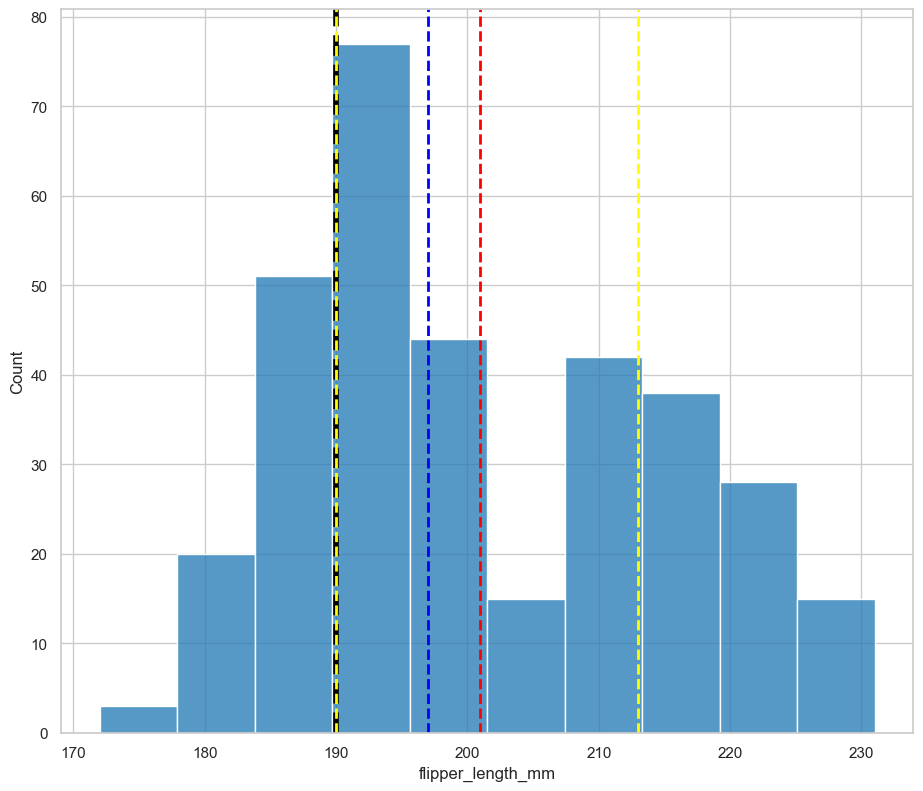

In [40]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
)

# Colocar una linea roja punteada que nos indique la media o promedio
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

# Colocar una linea azul punteada que nos indique la mediana
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

# Colocar una linea rnegra punteada que nos indique la moda
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mode().values[0],
    color='black',
    linestyle='dashed',
    linewidth=4
)

# Colocar una linea amarilla punteada que nos indique el q1
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

# Colocar una linea amarilla punteada que nos indique el q3
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

## Diagrama de caja / boxplot

<AxesSubplot: xlabel='flipper_length_mm'>

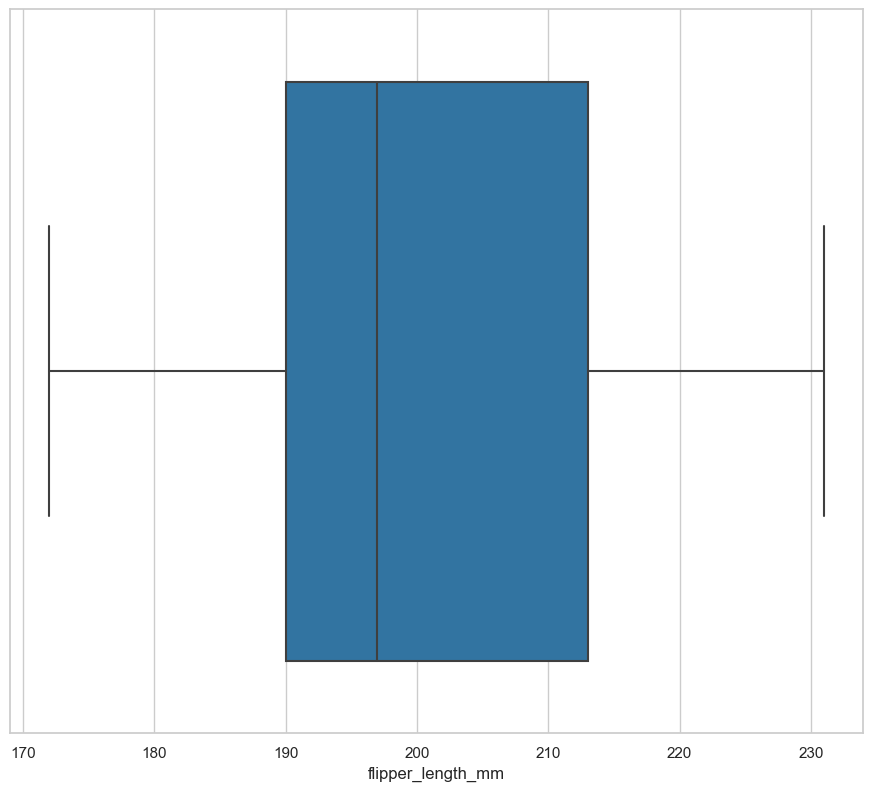

In [41]:
sns.boxplot(
    x=processed_penguins_df.flipper_length_mm,
)

## Limitaciones


Este código define una función que calcula el ancho de banda óptimo (o "bin width") para un histograma utilizando la regla de Freedman-Diaconis. La regla de Freedman-Diaconis se utiliza para determinar un buen ancho de las "barras" (bins) en un histograma, de manera que se pueda ver mejor la distribución de los datos sin perder detalles.  
En seaborn podemos ingresar este parametro optimo con bindwith. En el caso de flipper_length_mm es 3.19

In [42]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75, numeric_only=True) - x.quantile(0.25, numeric_only=True)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

freedman_diaconis_bindwidth(processed_penguins_df)

bill_length_mm         1.372642
bill_depth_mm          0.467603
flipper_length_mm      3.469315
body_mass_g          184.778737
dtype: float64

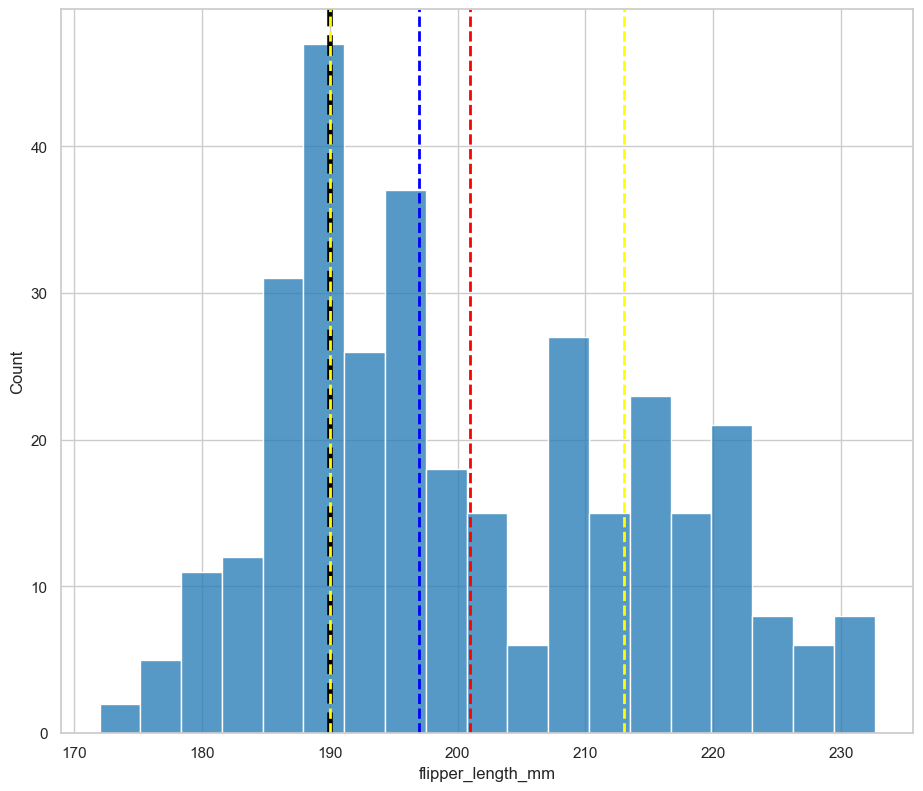

In [43]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=3.19
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mode().values[0],
    color='black',
    linestyle='dashed',
    linewidth=4
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

# Distribuciones: PMFs, CDFs y PDFs
### 1. PMF (Función de Masa de Probabilidad)
- **¿Qué es?**: La PMF se usa para describir distribuciones de variables **discretas**.
- **¿Qué hace?**: Muestra la probabilidad de que una variable aleatoria tome un valor específico.
- **Ejemplo**: Si lanzas un dado, la PMF te diría la probabilidad de obtener un 1, un 2, etc.

### 2. CDF (Función de Distribución Acumulada)
- **¿Qué es?**: La CDF describe la probabilidad de que una variable aleatoria sea **menor o igual** a un valor específico.
- **¿Qué hace?**: Muestra cómo se acumulan las probabilidades a medida que avanzamos a través de los valores posibles de la variable.
- **Ejemplo**: Si lanzas un dado, la CDF te diría la probabilidad de obtener **1 o menos**, **2 o menos**, etc.

### 3. PDF (Función de Densidad de Probabilidad)
- **¿Qué es?**: La PDF se usa para describir distribuciones de variables **continuas**.
- **¿Qué hace?**: Muestra la probabilidad de que una variable aleatoria tome un valor en un rango específico. No te da la probabilidad exacta, sino la densidad de probabilidad.
- **Ejemplo**: Si mides la altura de personas, la PDF te diría la densidad de probabilidad de que alguien tenga una altura entre 1.70 m y 1.80 m.


## Funciones de probabilidad de masas (PMFs)
Cual es la probabilidad de que una variable tenga un valor determinado

### Utilizando seaborn

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

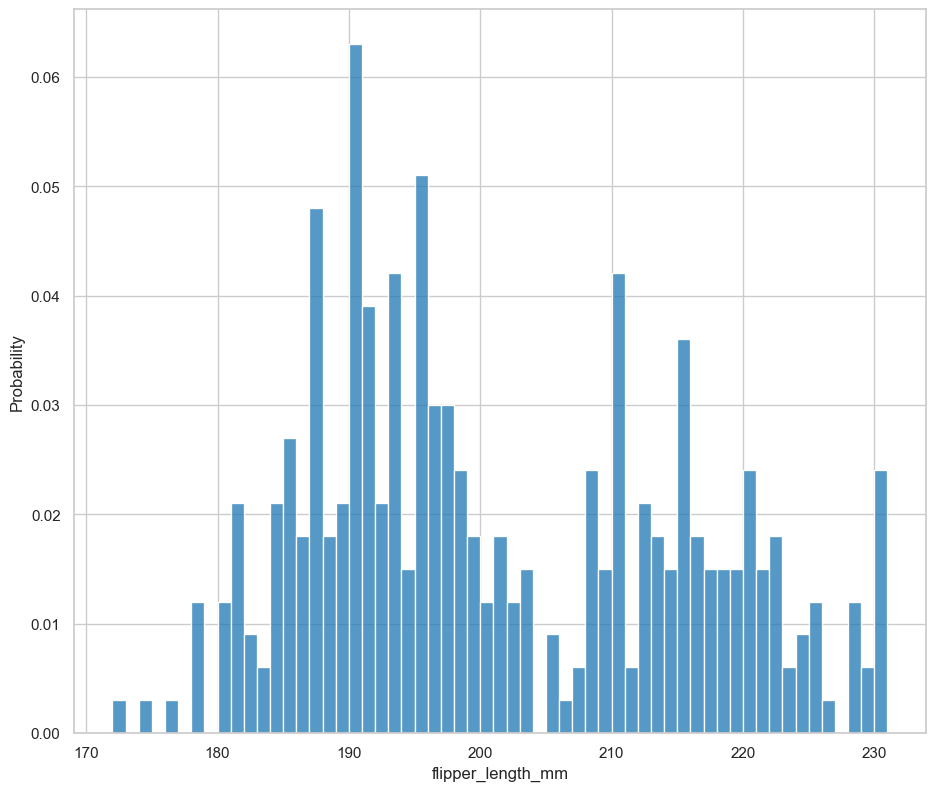

In [44]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

### Utilizando empiricaldist

In [45]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

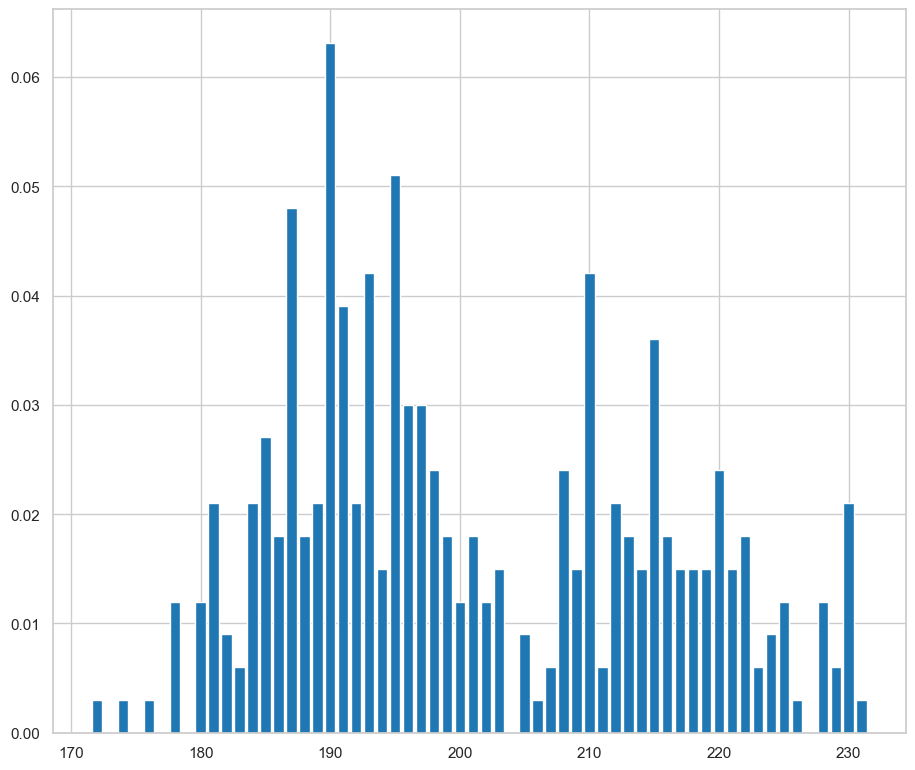

In [46]:
pmf_flipper_length_mm.bar()

In [47]:
pmf_flipper_length_mm(190)

0.06306306306306306

In [48]:
processed_penguins_df.flipper_length_mm.max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando seaborn

Cual es la probabilidad de que un pinguino tenga longitud de aleta de 203mm o menos.  
R/ 0.6

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

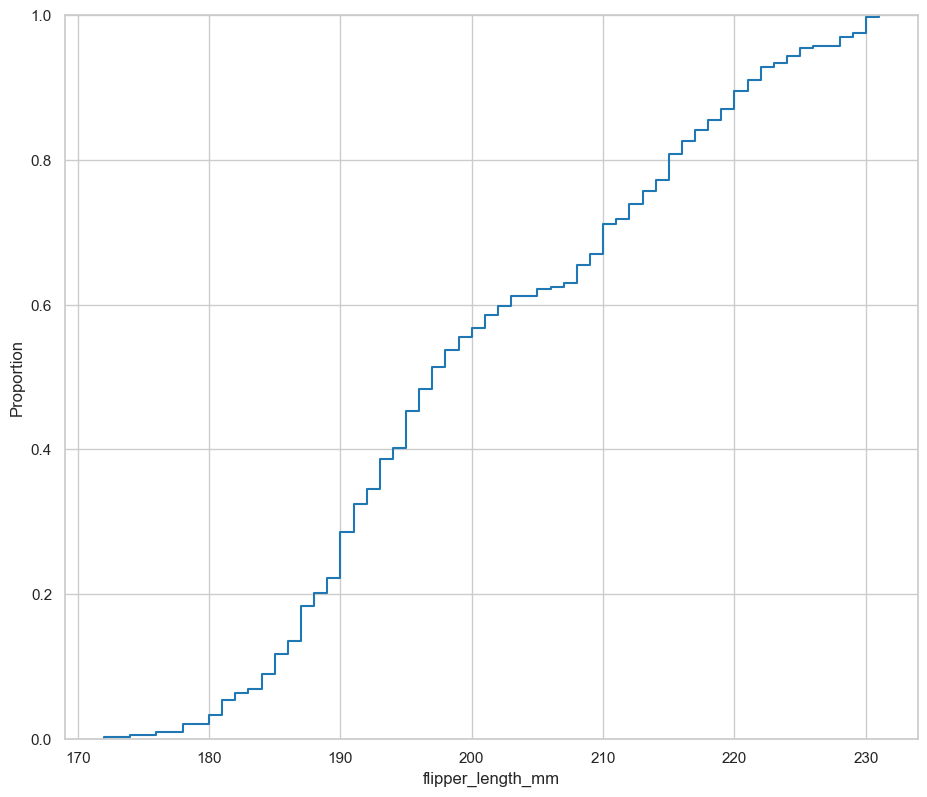

In [49]:
sns.ecdfplot(
    data=processed_penguins_df,
    x="flipper_length_mm"
)

### Utilizando empiricaldist

In [50]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

200 0.5675675675675675


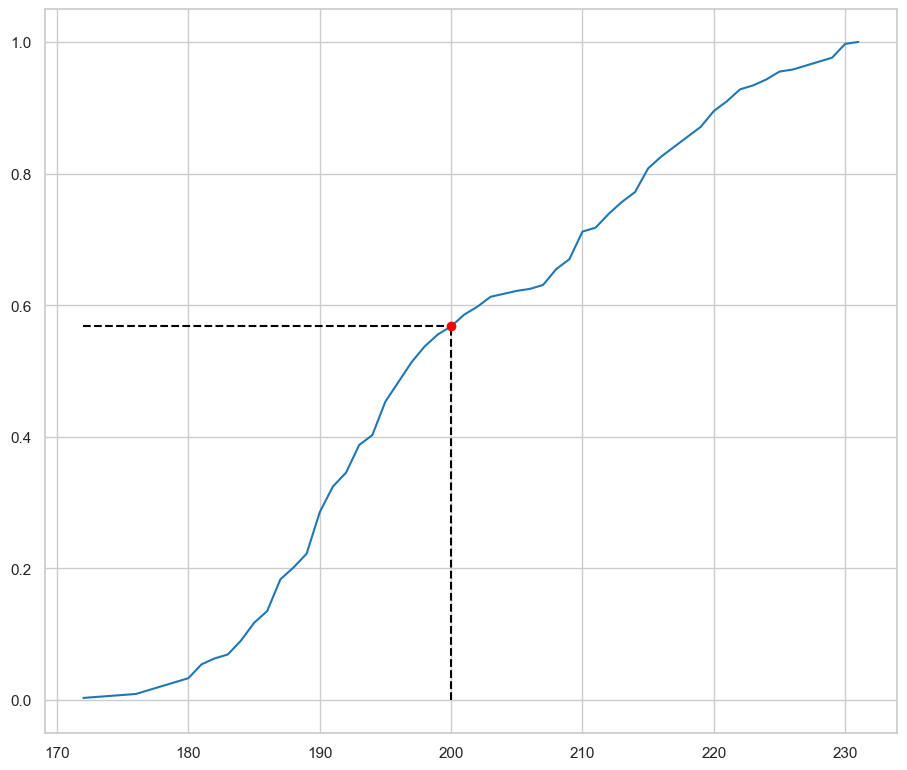

In [51]:
cdf_flipper_length_mm.plot()

q = 200 # Specify quantity
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)
print(q,p)
plt.plot(q, p, 'ro') # punto rojo

En el siguiente ejemplo vamos a encontrar algo curioso. Es que si encontramos los valores que corresponden a las probabilidades 0.25 y 0.75, encontraremos el mismo rango intercuartilico.

[190. 213.] (0.25, 0.75)


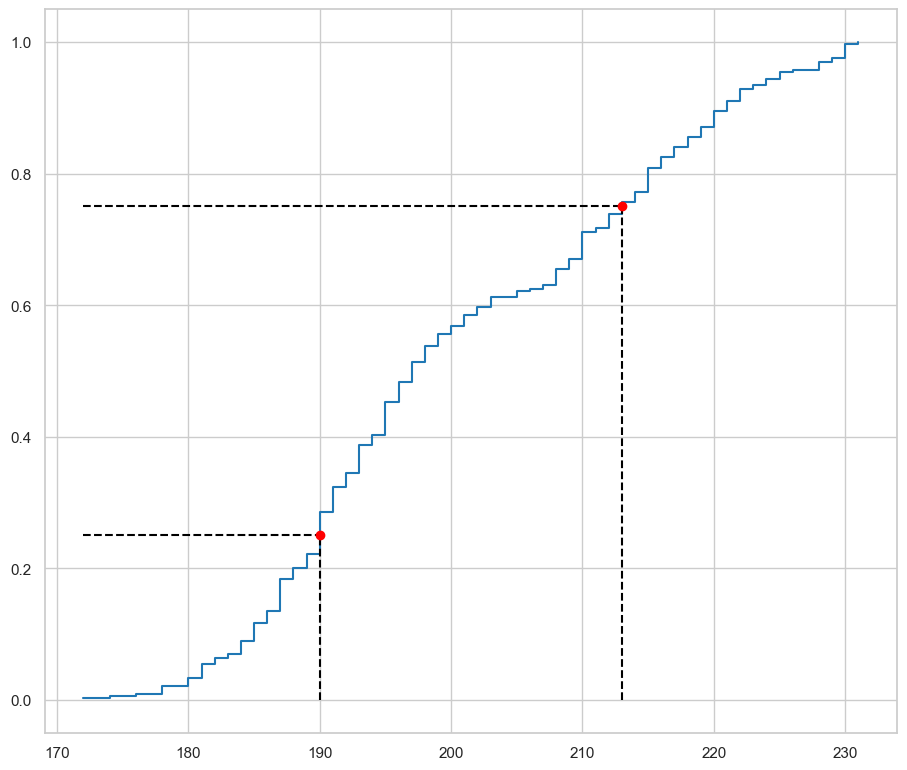

In [52]:
cdf_flipper_length_mm.step()

p_1 = 0.25 # Specify probability
p_2 = 0.75

ps = (0.25, 0.75) # IQR
qs = cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

print(qs, ps)

### Comparando distribuciones

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

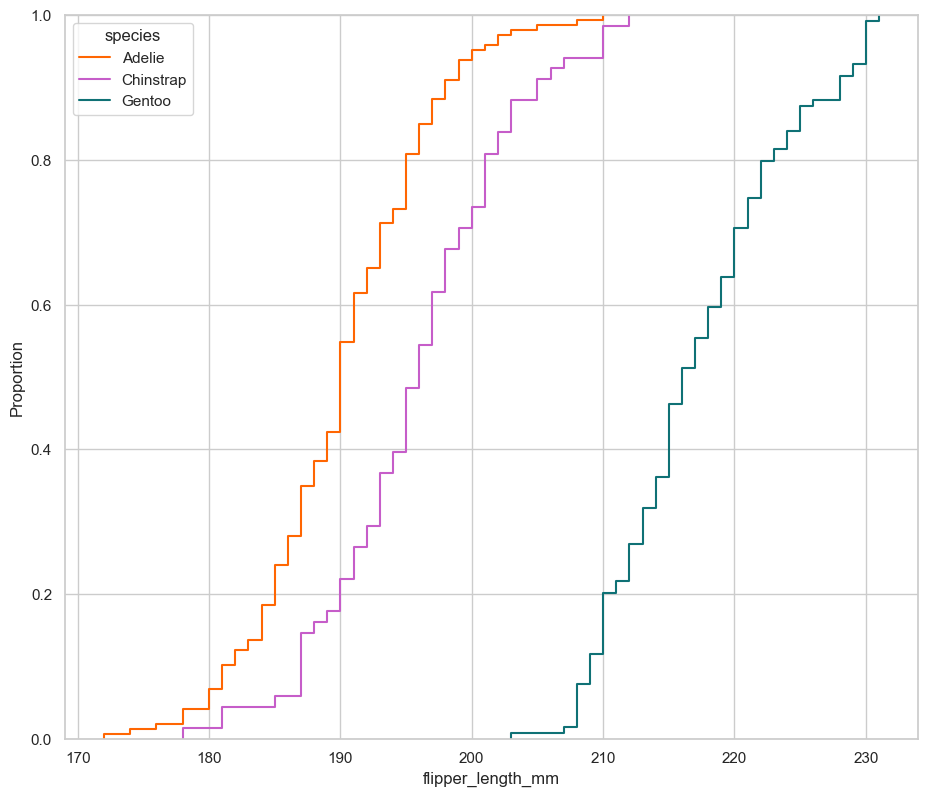

In [53]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

## Funciones de densidad de probabilidad y usos
Similar al calculo del PMF, nos permite ver la probabilidad de los diferentes valores pero de manera continua (incluye decimales, o valores que incluso no tienen muestra).

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

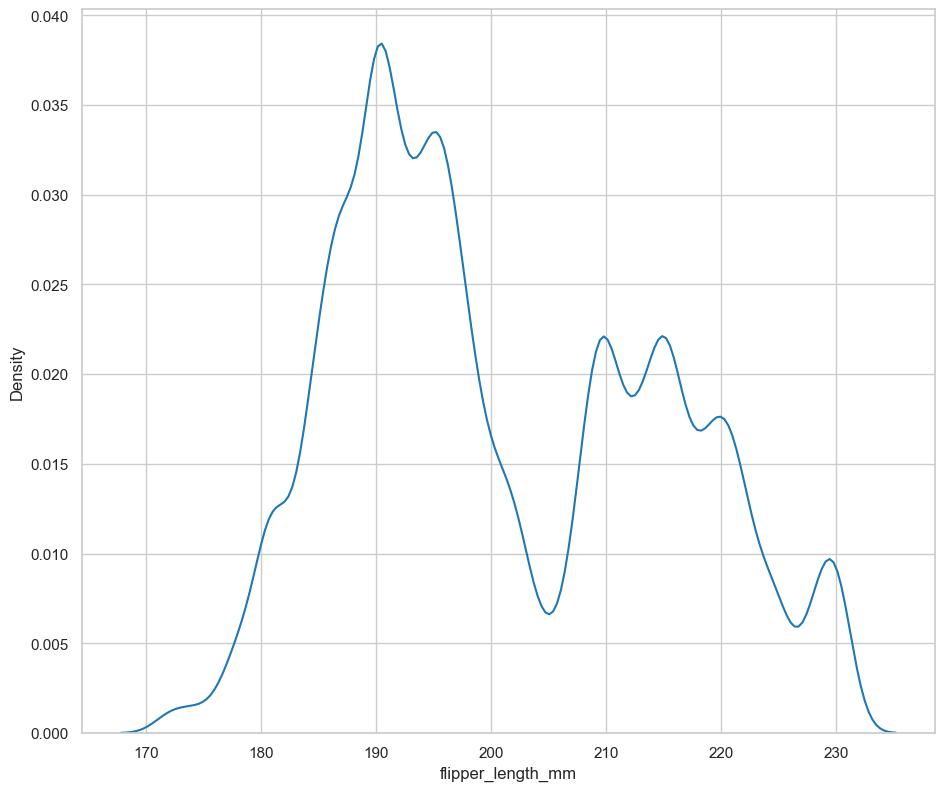

In [54]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    bw_method=0.1
)

## Las PDF nos van a permitir hacer comparaciones con distribuciones normales.
Vamos hacer el siguiente ejercicio. A partir de los estadisticos que ya sabemos sacar con describe(), vamos a identificar el valor maximo y minimo de la variable body_mass_g. Con esto, vamos a poder generar una distribución normal aleatoria por computadora y compararla con los datos reales. 

In [ ]:
# Guardamos como clave, valor los resultados en la variable stats
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

A continuación generamos un vector aleatorio de 42 muestras y estableciendo el max y min, para generar una cdf normal y compararla con la cdf real.

<AxesSubplot: >

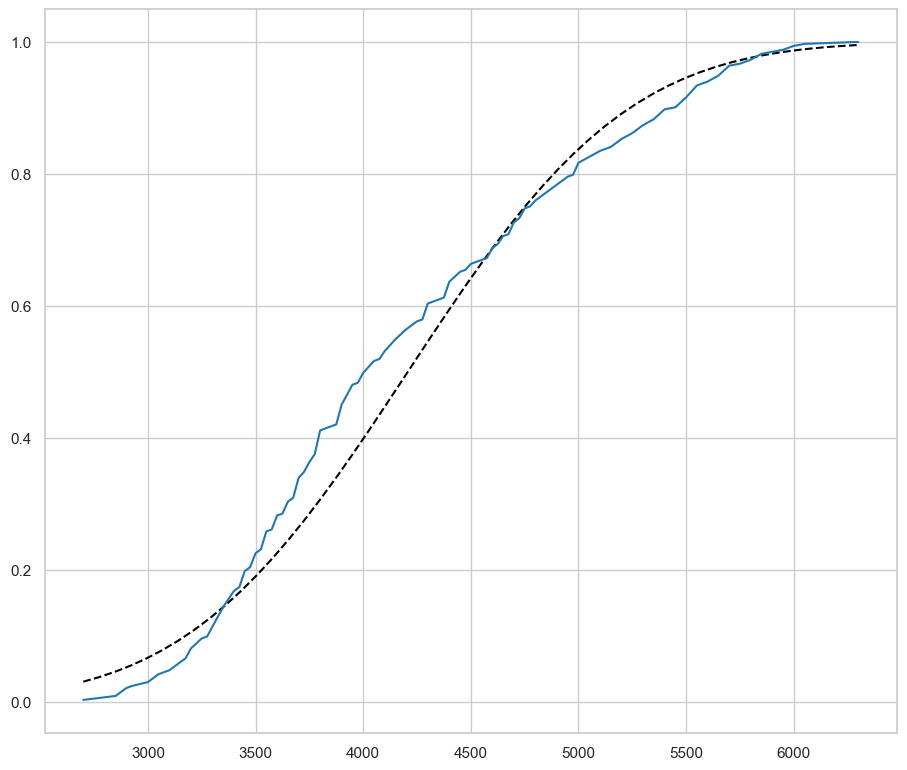

In [ ]:
# CDF normal generada por computadora
np.random.seed(42)
# el 42 se le llama numero semilla y me garantiza que los numeros aleatorios 
# siempre sean los mismos y poder reproducir los mismos resultados.
# De hecho puede ser cualquier numero entero positovo o negativo, 
# pero 42 se ha vuelto popular en los programadores.

xs = np.linspace(stats['min'], stats['max'])
# Esta linea genera un vector de 50 muestras por defecto entre max y min
# Si queremos especificar 100 muestras, lo hacemos asi xs = np.linspace(stats['min'], stats['max'],100)
 
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
# scipy.stats.norm(stats['mean'], stats['std']) hasta aquí creamos una distribución normal.
# .cdf(xs) calcula la función de distribución acumulativa (CDF) para cada valor en xs

plt.plot(xs, ys, color='black', linestyle='dashed') # Dibujamos las variables xs y ys

#CDF real
empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

Aqui se observa que la distribución real de los datos no se comporta de manera normal.
Otra forma en que podemos hacer una comparación es usando las PDF normal y PDF real.

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

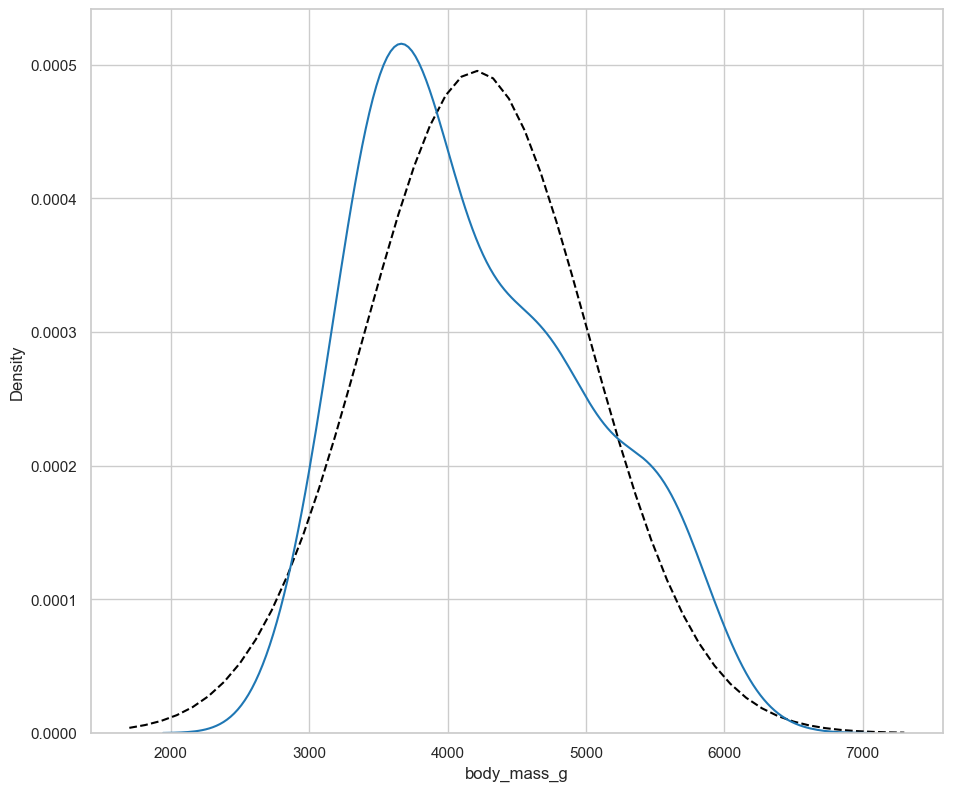

In [ ]:
#PDF normal generada por computadora
xs = np.linspace(stats['min']-1000, stats['max'] + 1000)
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

#PDF real
sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g'
)

Aquí podemos ver que la distribución real esta sesgada hacia la izquierda.

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números  
Dice que, a medida que hacemos más repeticiones de un experimento aleatorio (es decir, aumentamos el número de muestras), el promedio de los resultados obtenidos se acerca al valor esperado o teórico.

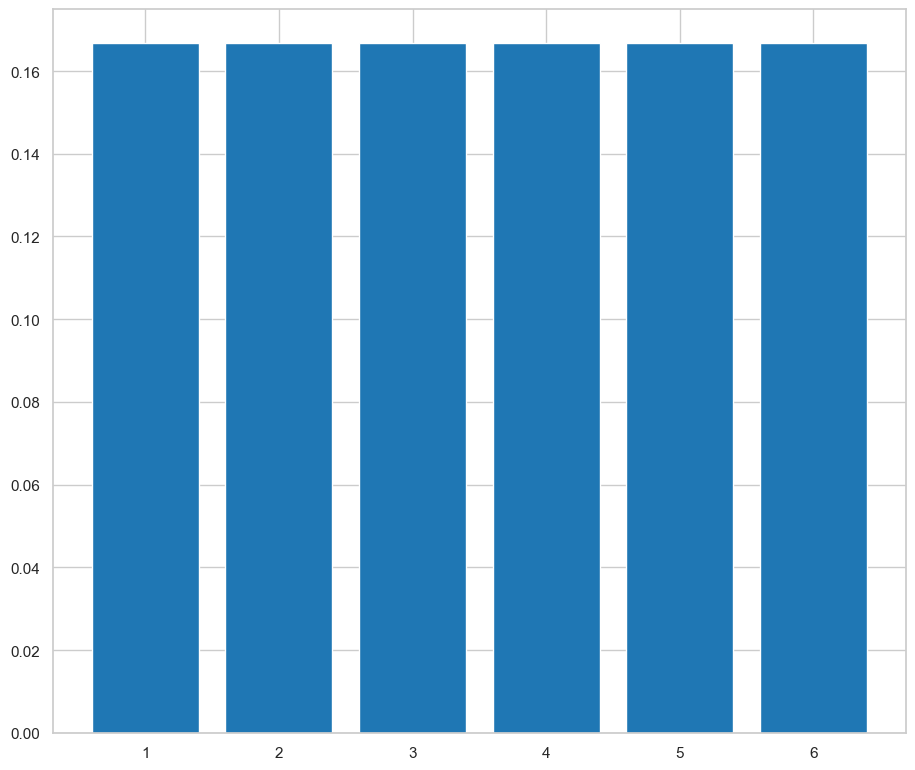

In [ ]:
# Ingresamos a una funcion los 6 lados de un dado, y nos da que la probabilidad teorica es 1/6
# Así la variable nos simula un dice (dado en en ingles)
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

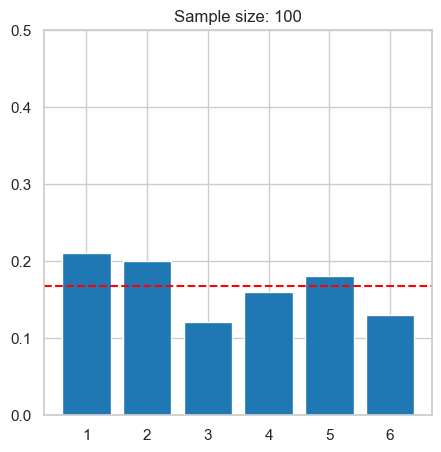

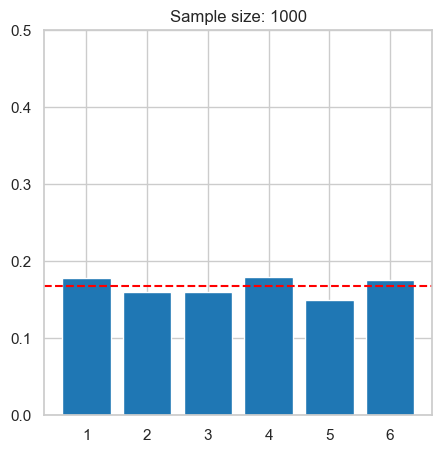

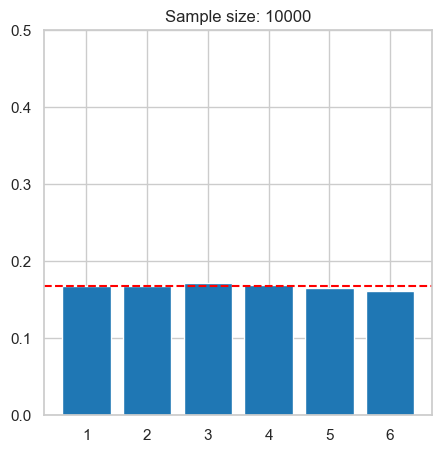

In [ ]:
# Aqui vemos como funciona la probabilidad mientras aumentamos las muestras

# Se define una lista con tres tamaños de muestra:
for sample_size in (1e2, 1e3, 1e4):# 10^2 = 100, 10^3 = 1000, y 10^4 = 10000.
    sample_size = int(sample_size) # Garantizamos que la variable sea entero
    values = dice.sample(sample_size) # Genera sample_size veces el lanzamiento de un dado
    sample_pmf = empiricaldist.Pmf.from_seq(values) #Los valores obtenidos los ingresamos a una pmf
    # Graficamos la PMF para 1e2, 1e3 y 1e4
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color = 'red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f"Sample size: {sample_size}")
    
    #Podemos observar que entre mas grande el sample size, nos acercamos a la probabilidad teorica.


## Teorema del límite central

El Teorema del Límite Central dice que, sin importar cómo sea la distribución original de los datos, si tomas suficientes muestras y calculas sus medias, esas medias seguirán una distribución normal. Este teorema es clave para muchas técnicas estadísticas y hace que sea posible usar la distribución normal en situaciones en las que no tenemos datos que sigan una distribución normal.
Si tomas muchas muestras aleatorias de cualquier cosa (sin importar lo que sea) y calculas el promedio de cada una de esas muestras, esos promedios estarán cada vez más cerca de seguir una forma de campana, es decir, una distribución normal, cuando el tamaño de la muestra sea grande.

### Ejemplo para entenderlo:

Imagina que tienes un dado. Los números que puedes obtener son del 1 al 6, ¿cierto? Si lanzas el dado una vez, obtienes un número entre 1 y 6, sin un patrón claro.

Ahora, imagina que lanzas el dado 10 veces, y calculas el promedio de esos 10 números. Esa media será un número diferente a cada vez, pero si lo repites muchas veces, obtendrás promedios más cercanos entre sí.

Si sigues haciendo esto, es decir, lanzando el dado muchísimas veces y calculando siempre el promedio de cada grupo de 10 lanzamientos, verás que esos promedios empiezan a formar una curva de campana (la famosa distribución normal o "curva normal"), aunque el dado no sigue una distribución normal por sí mismo.

### ¿Por qué esto pasa?

- Al principio, con pocas muestras (pocos lanzamientos), los promedios pueden ser muy diferentes entre sí.
- Pero cuando tienes muchas muestras (miles de lanzamientos), los promedios empiezan a agruparse alrededor de un valor central y se acercan a una forma de campana.

### ¿Qué significa esto?

1. **Cualquier dato puede dar una curva normal**: Aunque lo que estás midiendo no tenga una distribución normal (como lanzar un dado), si tomas suficientes muestras y calculas los promedios, esos promedios formarán una curva normal.

2. **Con suficientes datos, todo se vuelve predecible**: Este teorema nos permite usar la distribución normal para hacer predicciones, incluso si los datos originales no siguen una distribución normal.

A partir de la variable sexo, que es una variable categorica de dos estados male o female, podemos crear una distribución binomial que es donde se modela el número de éxitos en una secuencia de ensayos independientes y con la misma probabilidad de éxito en cada ensayo.
Como male y female son variables categoricas y la distribución binomial trabaja con numeros, podemos hacer un reemplazo de variables así: male 1 y female 0.

La distribución binomial se aproxima a una distribución normal cuando el número de ensayos es grande (esto se conoce como el Teorema del Límite Central). Esto es muy util porque sin importar de que tipo de distribución sean tus datos, puedes obtener una distribución normal con la cual ya se puede trabajar hacerle todo tipo de preguntas interesantes

In [ ]:
# processed_penguins_df.sex: Accede a la columna 'sex' del DataFrame 'processed_penguins_df'.

# value_counts(): Cuenta la frecuencia de cada valor único dentro de la columna 'sex'.
# Es decir, cuántos 'Male' y cuántos 'Female' hay en esa columna.

# normalize=True: Hace que, en lugar de devolver solo la cantidad de veces que aparece cada valor,
# devuelva la proporción (o frecuencia relativa) de cada valor respecto al total.

# En otras palabras, en vez de mostrar solo el número de 'Male' y 'Female', 
# se mostrará el porcentaje que representa cada uno con respecto al total de valores en la columna.

# 51% machos y 49% hembras

processed_penguins_df.sex.value_counts(normalize=True)

Male      0.504505
Female    0.495495
Name: sex, dtype: float64

In [120]:
# Reemplazamos la variable categorica sex por numeros 1 y 0

sex_numeric = processed_penguins_df.sex.replace(['Male', 'Female'], [1, 0])
sex_numeric

0      1
1      0
2      0
4      0
5      1
      ..
338    0
340    0
341    1
342    0
343    1
Name: sex, Length: 333, dtype: int64

## Número de muestras idóneo

El número de muestras **idóneo** depende de varios factores, como el tamaño de la muestra individual, el tipo de datos y el propósito del análisis. Sin embargo, hay algunas pautas generales que pueden ayudarte a determinar un número adecuado de muestras para obtener resultados confiables.

### Factores a considerar:

1. **Tamaño de la muestra individual (`sample_size`)**:
   - El tamaño de cada muestra tiene un impacto significativo en la precisión de las estimaciones. Cuanto mayor sea el tamaño de la muestra, más confiables serán las medias de las muestras y más se ajustarán a una distribución normal, como establece el **Teorema del Límite Central**.
   - Idealmente, el tamaño de la muestra debería ser lo suficientemente grande para que la distribución de las medias de las muestras sea representativa de la población. Para muchas situaciones, un tamaño de muestra de **30 o más** es suficiente para que las distribuciones muestren características normales (aunque esto puede variar dependiendo del tipo de datos).

2. **Número de muestras (`number_samples`)**:
   - El número de muestras depende de la precisión deseada. Cuantas más muestras tomes, más preciso será el valor promedio de las medias de las muestras. Sin embargo, hay un punto de **diminución de rendimiento**: después de un número determinado de muestras, agregar más muestras no mejora significativamente los resultados.
   - Un buen punto de partida podría ser **1000 muestras**. Esto es suficiente para obtener una distribución confiable de las medias de las muestras y verificar el Teorema del Límite Central.
   - Si el número de muestras es demasiado grande (por ejemplo, más de **100,000 muestras**), puede que no veas una mejora significativa, y el proceso podría volverse más lento sin aportar beneficios adicionales a la estimación.

### Recomendaciones:

1. **Para un buen balance entre precisión y eficiencia**:
   - Un **número de muestras entre 1000 y 10,000** es generalmente suficiente en la mayoría de los casos. Esto es lo suficientemente grande como para obtener una distribución estable y confiable sin sobrecargar el sistema de cómputo.

2. **Para verificar el Teorema del Límite Central**:
   - El número de muestras puede ser **1000** o incluso **5000** dependiendo de la variabilidad de tus datos. Si la distribución de tus datos es compleja, puedes necesitar más muestras para observar claramente la convergencia hacia una distribución normal.

3. **Si quieres una mayor precisión**:
   - Si tu objetivo es obtener estimaciones muy precisas de las medias de las muestras y estás dispuesto a comprometer más tiempo de cómputo, podrías optar por un número más alto, como **50,000 o 100,000 muestras**.


In [ ]:
#Teorema de limite central

number_samples = 1000 # tomamos mil muestras
sample_size=35 # cada muestra de 35 pinguinos

samples_df = pd.DataFrame() # Creamos un dataframe vacío
samples_list = []           # Creamos una lista vacía

np.random.seed(42) # Definimos una semilla para que los resultados sean reproducibles
for i in range(1, number_samples + 1): # repetimos 1000 veces
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy() #Toma una muestra aleatoria de 35 pinguinos
    # Crear un DataFrame temporal con la muestra y agregarlo a la lista
    sample_name = f"sample_{i}" # Le da un nombre unico a cada muestra
    temp_df = pd.DataFrame({sample_name: sex_numeric_sample})
    samples_list.append(temp_df)

# Concatenar todas las muestras de una vez, lo que evitará la fragmentación
samples_df = pd.concat(samples_list, axis=1)
"""Beneficios de pd.concat():
    Eficiencia en memoria: Concatenar todas las columnas a la vez es más eficiente que 
    agregar una por una, especialmente cuando se manejan grandes volúmenes de datos.
    Evitar el warning: Al evitar las múltiples asignaciones, el DataFrame no se fragmenta 
    internamente y no aparecerá el warning de rendimiento.
"""

#samples_df.mean() calcula el promedio de cada muestra (es decir, el porcentaje de machos en cada muestra).
# .mean() sobre ese resultado calcula el promedio de todos los promedios, es decir, el promedio global de machos en la población estimada.
male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

# Un valor de 0 indicaría que todos los pingüinos en la muestra son hembras.
# Un valor de 1 indicaría que todos los pingüinos en la muestra son machos.
# Un valor de 0.6 indicaría que el 60% de los pingüinos en la muestra son machos.

Estimated percentage of male penguins in population is: 50.4457%


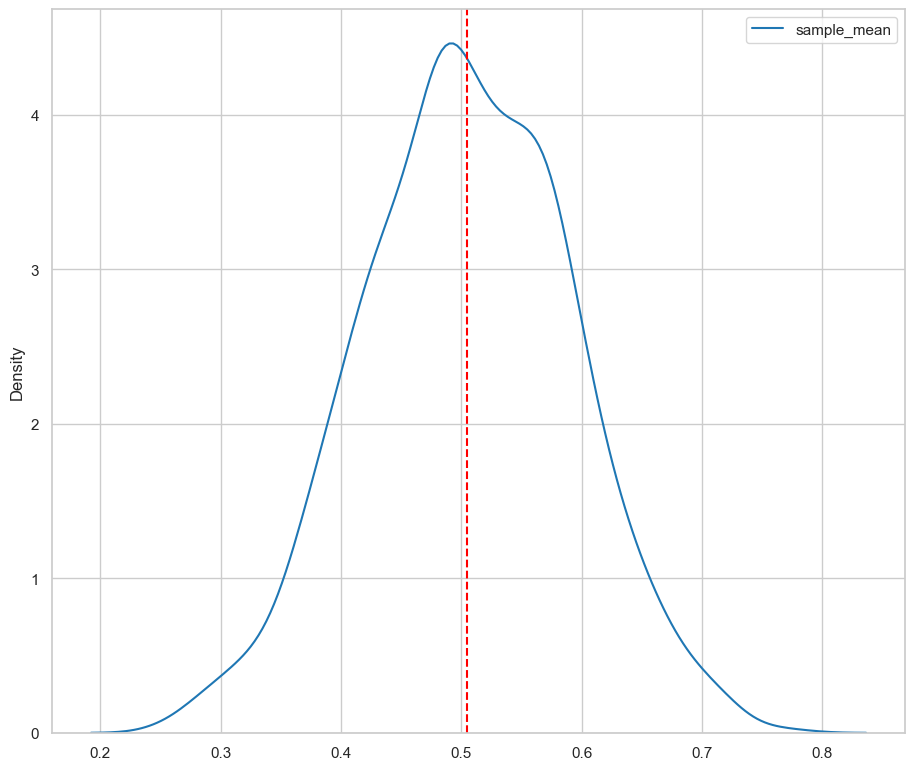

In [148]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial, bw_adjust=1) #El parámetro bw (ancho de banda) controla la suavidad de la estimación
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

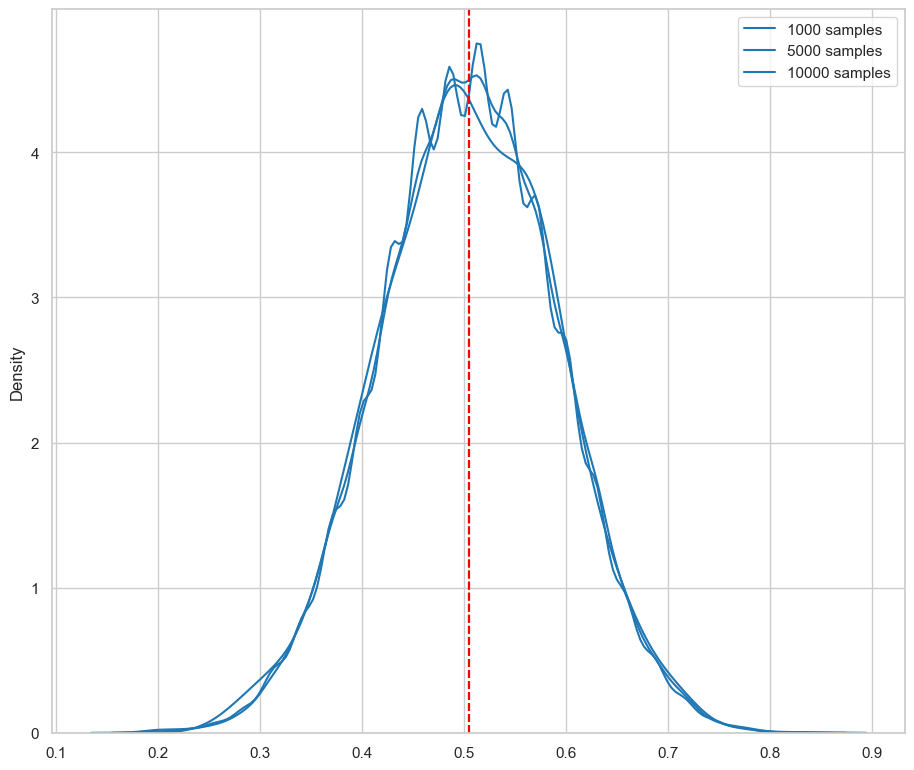

In [144]:
# Experimenta con diferentes números de muestras
# sample_size = 35
samples_list = []           # Creamos una lista vacía
np.random.seed(42) # Definimos una semilla para que los resultados sean reproducibles
for number_samples in [1000, 5000, 10000]:
    samples_df = pd.DataFrame()
    for i in range(number_samples):
        sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
        sample_name = f"sample_{i}"
        temp_df = pd.DataFrame({sample_name: sex_numeric_sample})
        samples_list.append(temp_df)

    # Concatenar todas las muestras de una vez, lo que evitará la fragmentación
    samples_df = pd.concat(samples_list, axis=1)

    sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
    sns.kdeplot(data=sample_means_binomial, label=f'{number_samples} samples')
    plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

plt.legend()
plt.show()

Otra forma de ver el efecto de ir incrementando las muestras es con el siguiente código:
En donde vemos, que a medida que aumenta el numero de muestras los valores se van acercando a la linea roja que es el valor esperado (porcentaje de pinguinos macho)

In [150]:
# Calculamos el promedio con 1 muestra, luego con 2, con 3 y así hasta llegar a 1000 
number_samples = 1000
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)



(0.30450450450450445, 0.7045045045045044)

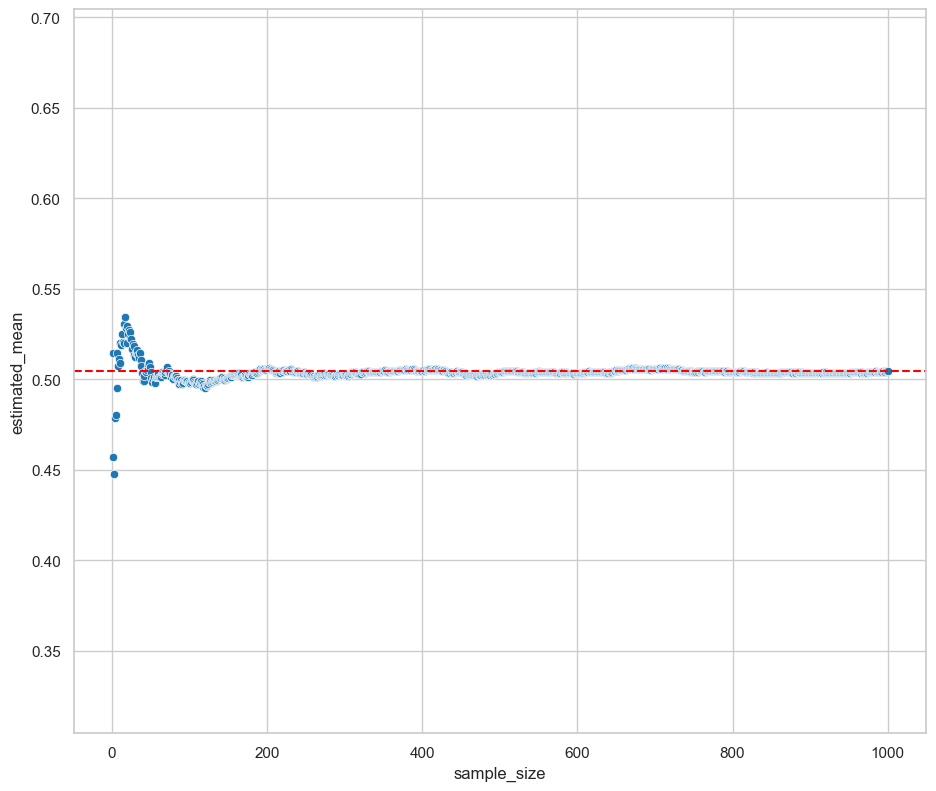

In [151]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

<h1 style="color: blue;">ANALISIS BIVARIADO con Variables Numéricas continuas</h1>

## La tecnica más comun son Gráficos de dispersión (scatter plots).

### Estableciendo relaciones entre dos variables con gráfica de puntos

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

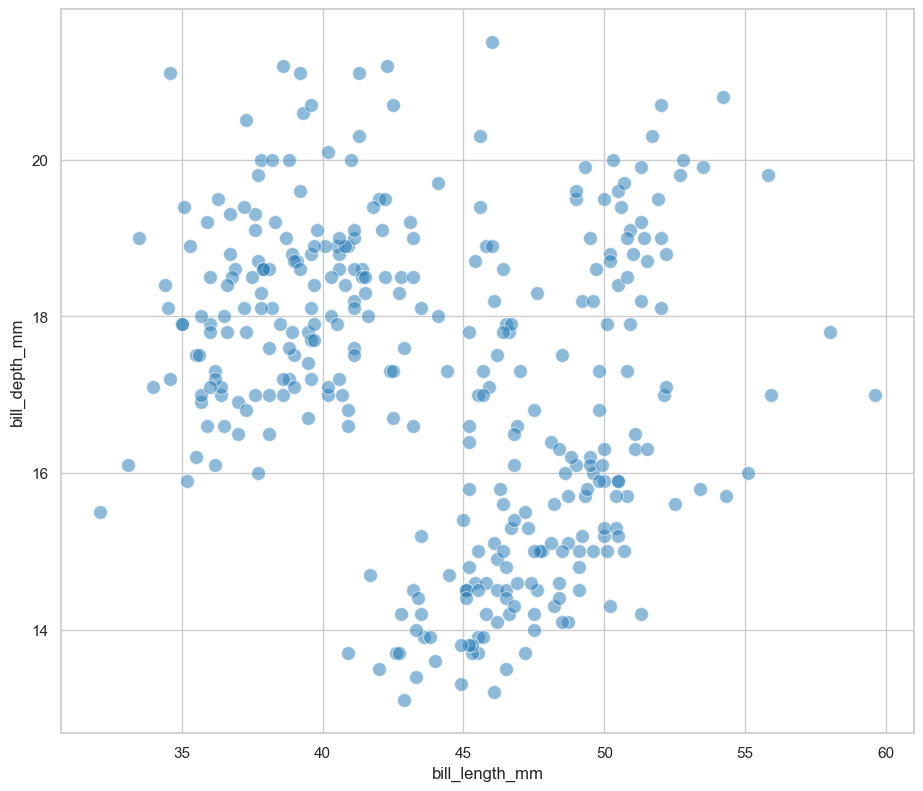

In [153]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2, # me resalta los datos que se solapan (por cada dos me da el color mas oscuro)
    s=100
)

### Otra forma, para observar relaciones entre dos variables con gráfica histograma de dos dimensiones 2D

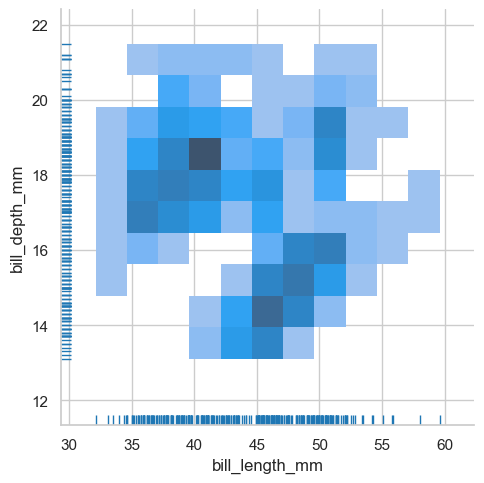

In [ ]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True # Esto nos dibuja lineas en los ejes por cada muestra
)

### Otra forma de observar las relaciones entre dos variables con gráfica de densidad (PDF)

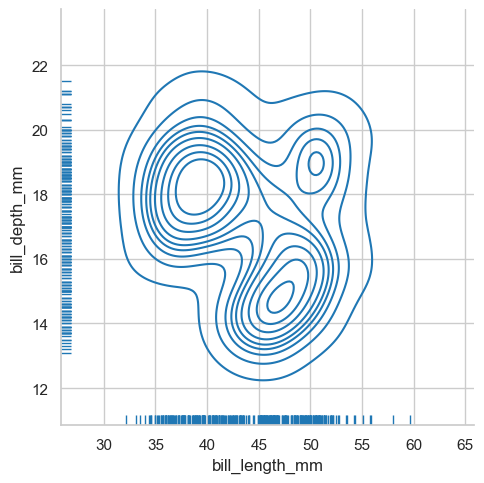

In [68]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    kind='kde',
    rug=True
)

### Otra forma para observar relaciones entre dos variables es con grafica de dispersion de puntos, cada eje con un histograma.

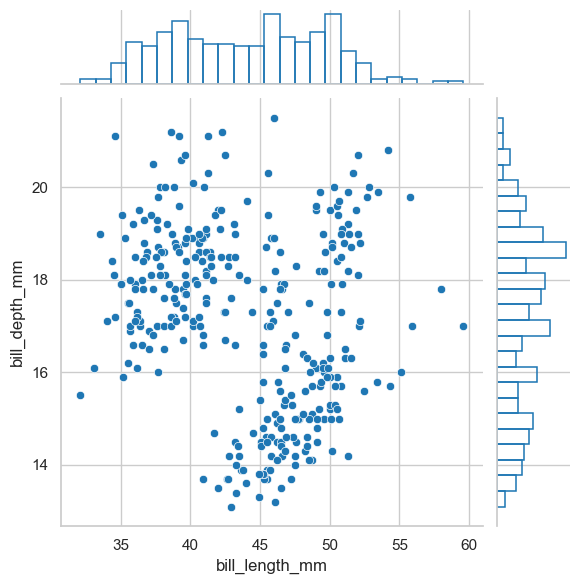

In [69]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    marginal_kws=dict(bins=25, fill=False)
)

<h1 style="color: blue;">ANALISIS BIVARIADO con Variables Numéricas una y=continua y una x=discreta</h1>

# Estableciendo relaciones: Gráficos de violín y boxplots

### Establecemos la relación con scatterplot. Lo cual nos genera datos sobre un mismo eje.

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

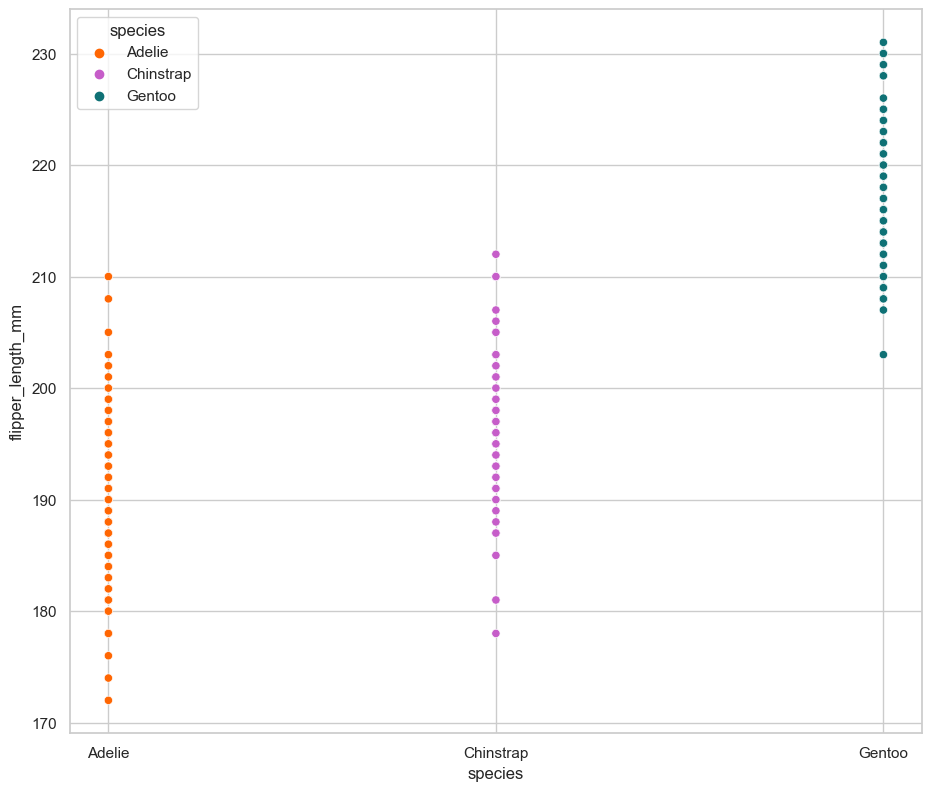

In [70]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

### A la anterior grafica, podemos hacerle un ajuste con stripplot, que lo que hace es añadir un "ruido" para poder ver mejor la concentración de los datos.

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

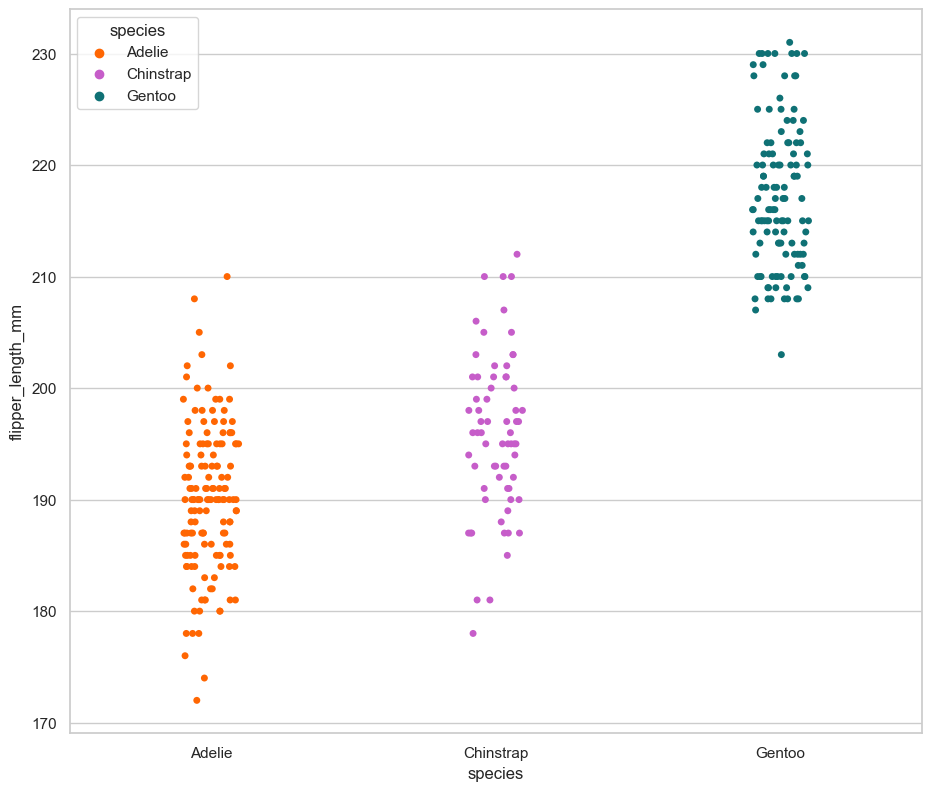

In [157]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

### Otra forma de ver los datos es con boxplot enriquecido con stripplot.

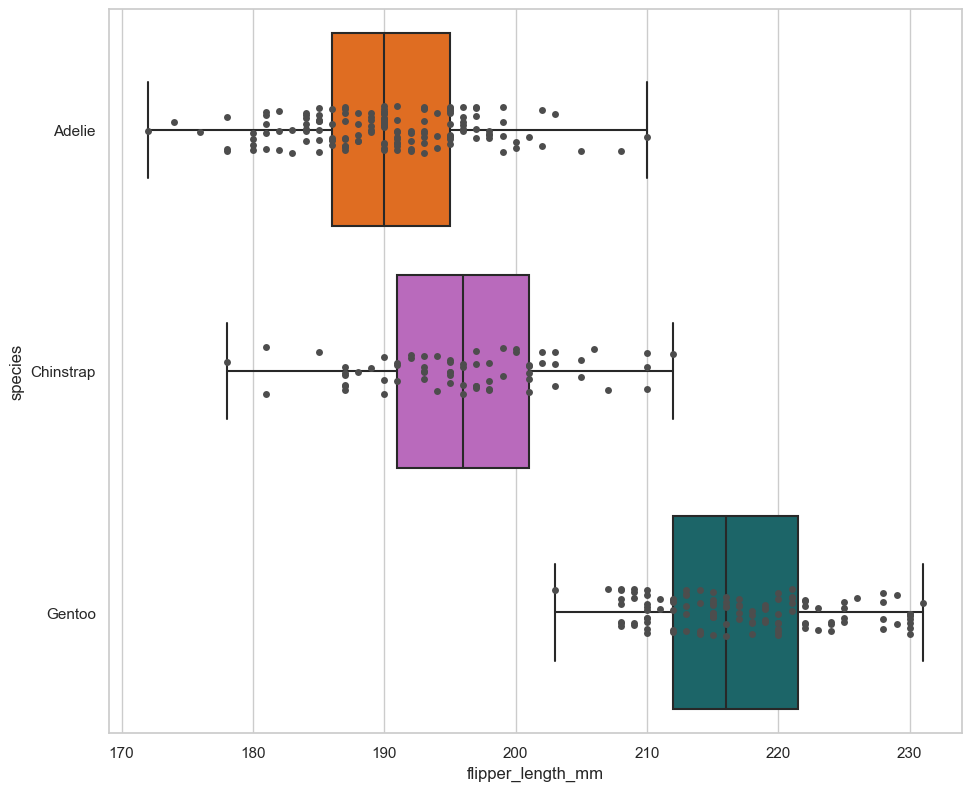

In [72]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color,
    whis=np.inf
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='.3'
)

### Otra forma de verlo es con la grafica de violin enriquecido tambien con stripplot.

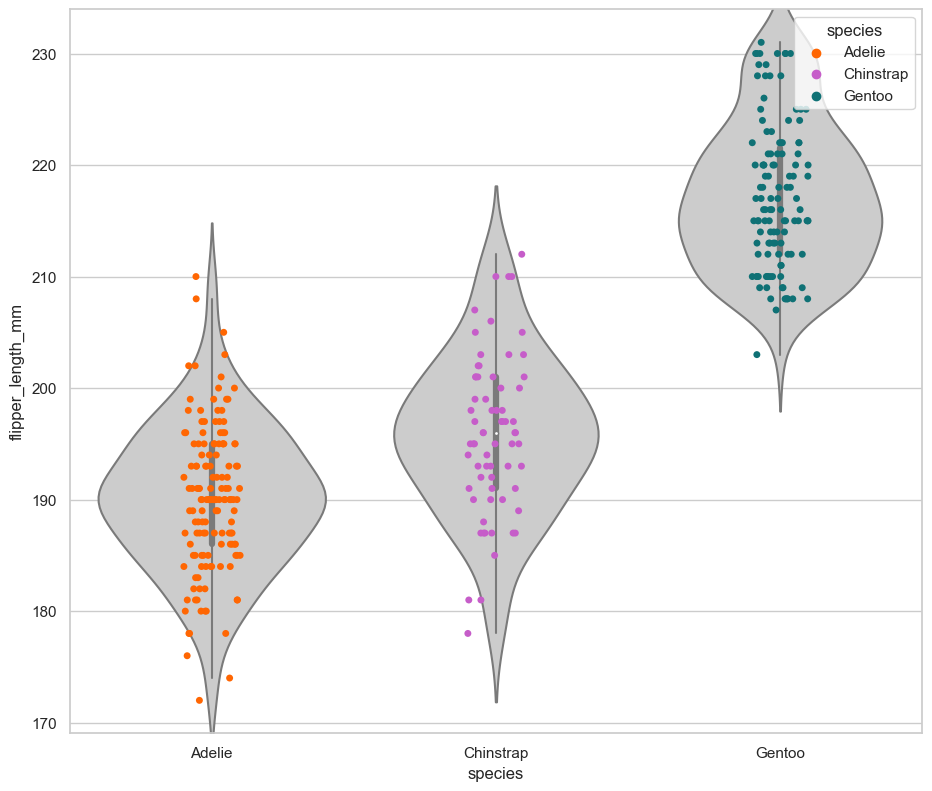

In [158]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

Otra forma de verlo es con la grafica de swarmplot, similar al stripplot pero mas ordenado.

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

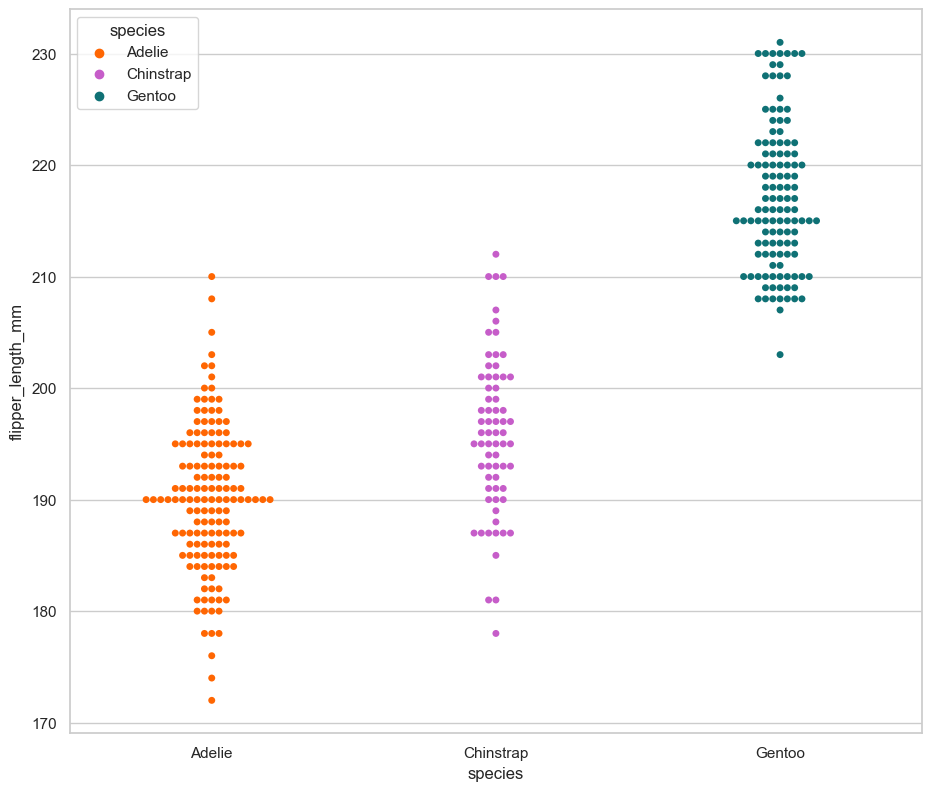

In [74]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

## Otra forma de observar relaciones entre dos variables numericas de una manera mas amplica es mediante matrices de correlación

### De esta manera podemos verificar si Existe una correlación lineal entre alguna de nuestras variables. Correlación de 1 es perfecta, 0 indica no hay correlación, -1 correlación divergente.  
### Nota: La correlación no indica causalidad es de tu parte validar si tiene sentido o no.

In [159]:
processed_penguins_df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,numeric_sex,is_adelie
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.344078,-0.836409
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,0.372673,0.531342
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.255169,-0.685947
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.424987,-0.550479
numeric_sex,0.344078,0.372673,0.255169,0.424987,1.000000,-0.007961
is_adelie,-0.836409,0.531342,-0.685947,-0.550479,-0.007961,1.000000


Una variable comparada consigo misma nos da una correlación de 1.(diagonal de 1)
Se ve una correlación fuerte entre el peso y longitud de la aleta.

### ¿Como puedo visualizar los coeficientes de correlación? La opción mas usada y bonita es el heatmap 

<AxesSubplot: >

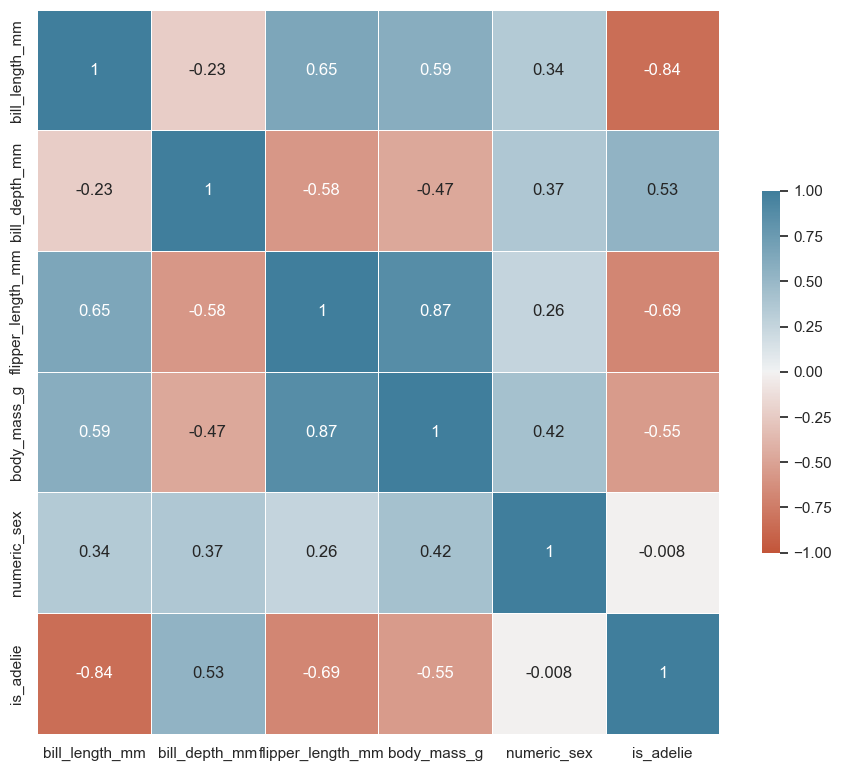

In [160]:
sns.heatmap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

### Otra forma de ver la matriz de correlación es con clustermap que lo que hace es organizar por grupos las correlaciones para identificar rapidamente las positivas y negativas, y su fuerza de correlación.

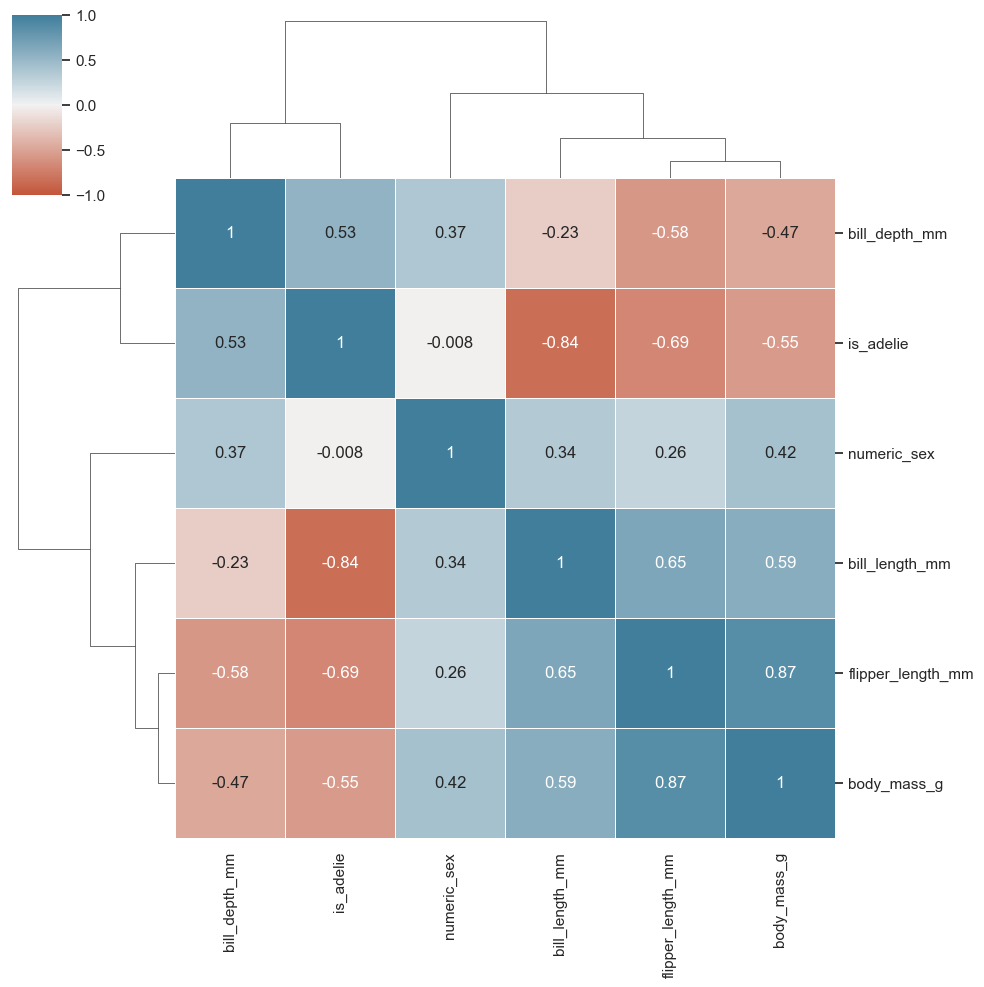

In [161]:
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap= sns.diverging_palette(20, 230, as_cmap=True), # 'BrBG'
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

### ¿Cómo podría representar una variable categórica como numérica discreta? Para elllo debemos convertir las variables categoricas en numericas. Veamos ejemplo con sexo.

In [163]:
processed_penguins_df = (
    processed_penguins_df
    .assign(
        numeric_sex=lambda df: df.sex.replace(['Female', 'Male'], [0, 1])

    )
)

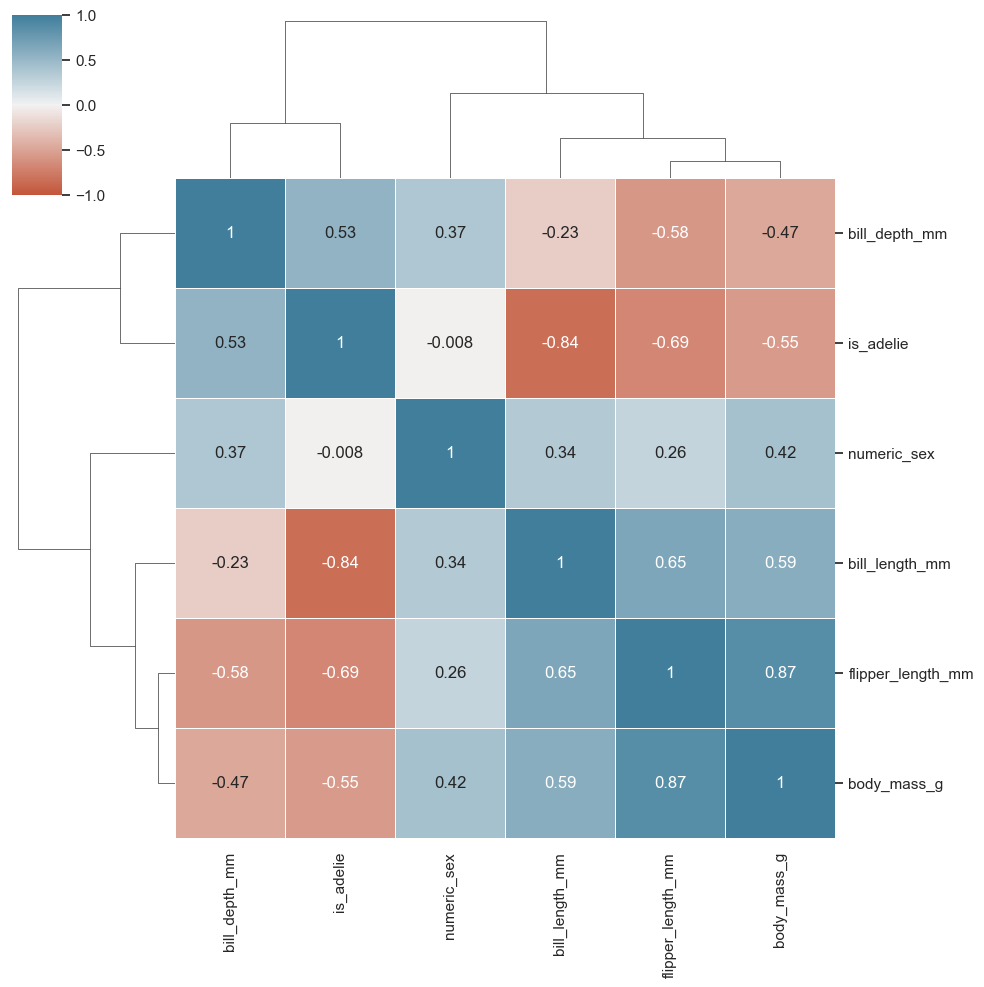

In [164]:
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap= sns.diverging_palette(20, 230, as_cmap=True), # 'BrBG'
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

## ¿Cuál es una límitante de los coeficientes de correlación lineal?

### Sólo nos ayuda a determinar la posible existencia de una correlación lineal, sin embargo, su ausencia no significa que no exista otro tipo de correlación, por ejemplo cuadrática.

array([[1.        , 0.00269802],
       [0.00269802, 1.        ]])

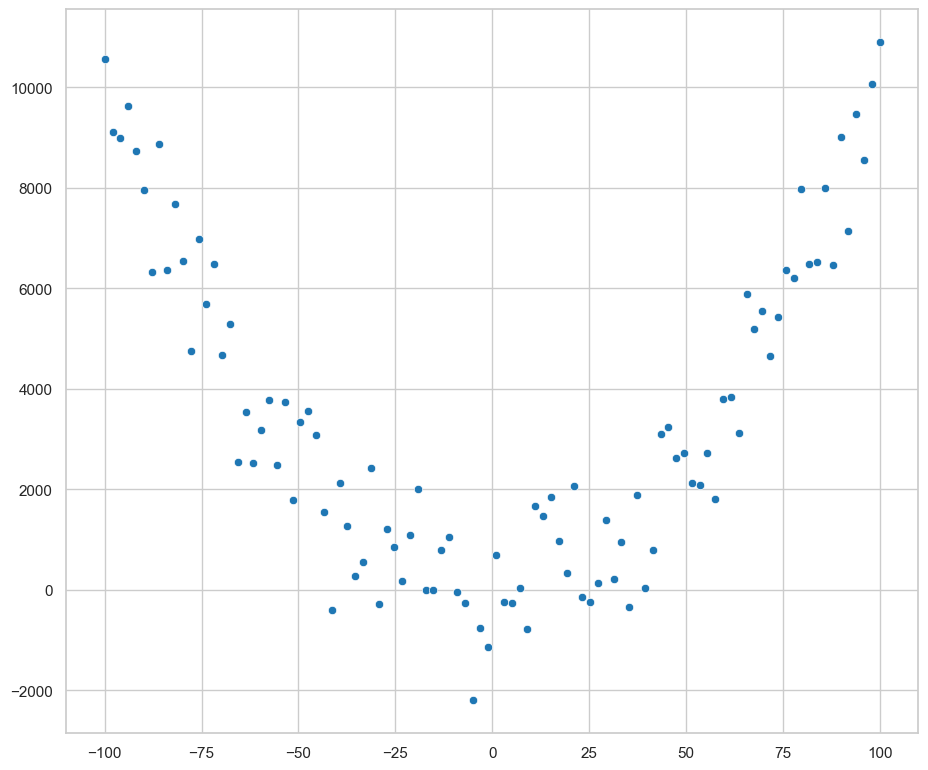

In [80]:
x = np.linspace(-100, 100, 100)
y = x ** 2
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x, y=y)
np.corrcoef(x, y)

array([[1.        , 0.91665357],
       [0.91665357, 1.        ]])

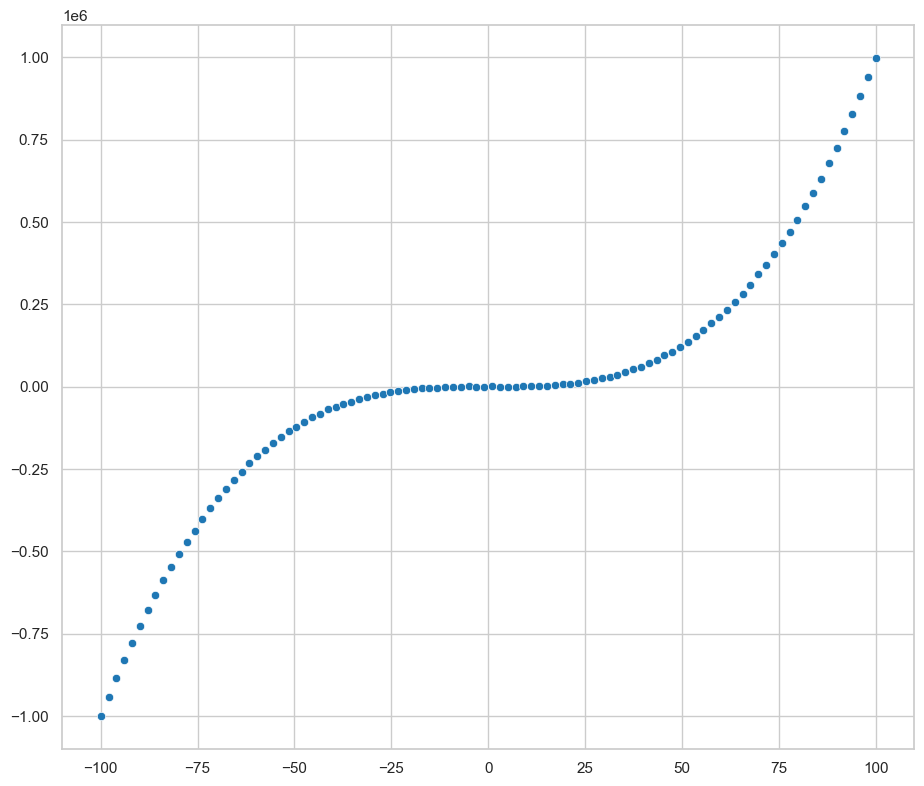

In [81]:
x = np.linspace(-100, 100, 100)
y = x ** 3
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x, y=y)
np.corrcoef(x, y)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

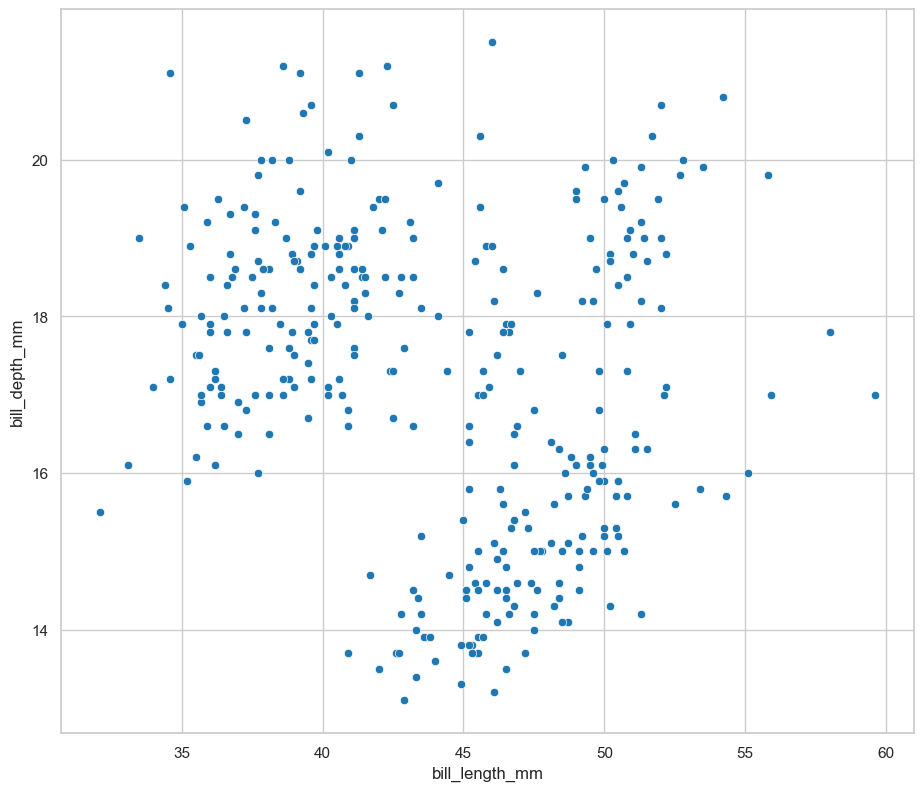

In [82]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

## ¿Existe algun tipo de correlación entre estas dos variables?

Con una correlación de -0.228626, la relación entre las dos variables (`bill_length_mm` y `bill_depth_mm`) es **débil y negativa**.

### ¿Qué significa una correlación de -0.23?

- **Correlación negativa**: El signo negativo indica que a medida que una de las variables aumenta, la otra tiende a disminuir, aunque la relación no es fuerte.
- **Correlación débil**: Un valor de -0.23 está bastante cerca de 0, lo que sugiere que la relación entre las dos variables es débil. Es decir, aunque hay una tendencia en la que una variable aumenta cuando la otra disminuye, esta tendencia no es muy pronunciada.

### Interpretación en contexto:
- Si `bill_length_mm` (longitud del pico) aumenta, `bill_depth_mm` (profundidad del pico) tiende a disminuir ligeramente, pero la relación no es lo suficientemente fuerte como para hacer predicciones fiables basadas en una de las variables respecto a la otra.
- Esta relación débil podría ser influenciada por otros factores que no están siendo considerados aquí, o podría ser simplemente que las dos variables no están fuertemente relacionadas.

## El coeficiente de correlación no nos habla del impacto de la relación

El **coeficiente de correlación de Pearson** mide la **fuerza y la dirección** de una relación lineal entre dos variables, pero **no nos indica el impacto** o la **causalidad** de esa relación. Aquí están las razones por las que no nos habla del impacto:

### 1. **Solo mide la relación lineal:**
   - El coeficiente de correlación **solo captura relaciones lineales**. Esto significa que si dos variables tienen una relación no lineal, el coeficiente de correlación no será capaz de detectarlo, aunque esa relación no lineal podría ser muy fuerte o significativa.
   
### 2. **No implica causalidad:**
   - Un coeficiente de correlación alto (ya sea positivo o negativo) **no significa que una variable cause el cambio en la otra**. Puede haber una **correlación espuria** donde dos variables estén correlacionadas debido a una tercera variable o por azar.
   - Ejemplo: El aumento en el consumo de helados y el aumento de accidentes de tráfico en verano pueden estar correlacionados, pero esto no significa que comer helado cause accidentes de tráfico. En realidad, ambos son impulsados por la misma causa: el calor del verano.

### 3. **No refleja el tamaño del impacto:**
   - La correlación solo indica si las variables se mueven juntas (positivamente o negativamente), pero **no nos dice cuánto cambia una variable cuando cambia la otra**. 
   - Para entender el impacto de una variable sobre otra, generalmente se necesitaría un modelo **de regresión** que no solo cuente la relación, sino que también cuantifique el impacto de una variable en función de otra (por ejemplo, cuántos puntos aumenta `bill_depth_mm` por cada milímetro adicional en `bill_length_mm`).

### 4. **El valor de la correlación no refleja la magnitud del cambio:**
   - Una correlación de, por ejemplo, 0.8 entre dos variables indica que hay una relación fuerte y positiva, pero **no nos dice cómo o cuánto cambiarán las variables si se cambia una**. 

### En resumen:
El coeficiente de correlación nos da información sobre **si** dos variables están relacionadas y si lo están de forma **positiva o negativa**, pero no nos dice **cuánto influye una sobre otra** ni **por qué** se produce esa relación. Para comprender el impacto de la relación, sería necesario un análisis más profundo, como un **modelo de regresión** o un análisis de causalidad.

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


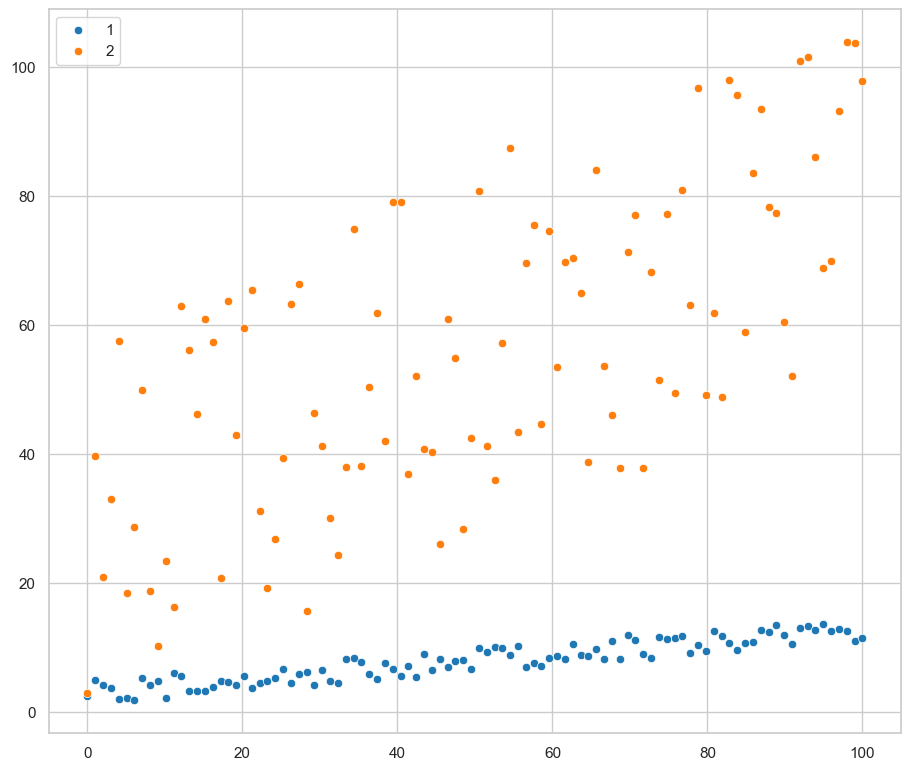

In [ ]:
# En este ejemplo vemos como no es conveniente fiarnos solo del valor de la correlación 
# sin ver la grafica de dispersión de puntos ya que nos perderíamos el impacto.
# En la grafica vemos:
# puntos azules muestran alta correlación con impacto bajo
# puntos naranjas muestran media correlación pero con impacto mas alto

np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

## ¿Como calcular el impacto de mi correlación?
### Estableciendo relaciones: Análisis de regresión simple


El siguiente código realiza un análisis de regresión lineal para dos conjuntos de datos diferentes utilizando la función `linregress` de la biblioteca `scipy.stats` y luego imprime los resultados.

### Descripción paso a paso:

**`scipy.stats.linregress(x=x_1, y=y_1)`**:
   - Se realiza una regresión lineal entre dos variables: `x_1` (variable independiente) y `y_1` (variable dependiente).
   - La función `linregress` calcula los coeficientes de la regresión lineal, que incluyen:
     - La pendiente de la recta de regresión (slope)
     - La intersección o el valor de la recta cuando `x` es 0 (intercepto). (intercept)
     - El valor de **r** (coeficiente de correlación de Pearson), que mide la fuerza de la relación lineal.
     - El valor **p** (p-value), que indica la significancia estadística de la regresión.
     - El **stderr** (error estándar), que mide la precisión de la estimación de los parámetros.

   El resultado de esta regresión se guarda en `res_1` y otro resultado para `res_2`

In [ ]:
# De las variables definidas anteriormente
res_1 = scipy.stats.linregress(x=x_1, y=y_1) # puntos azules x_1 y y_1
res_2 = scipy.stats.linregress(x=x_2, y=y_2) # puntos naranjas x_2 y y_2

# Aqui el parametro que mas nos sirve es el slope o pendiente de la linea recta.

print(res_1, res_2, sep="\n")

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


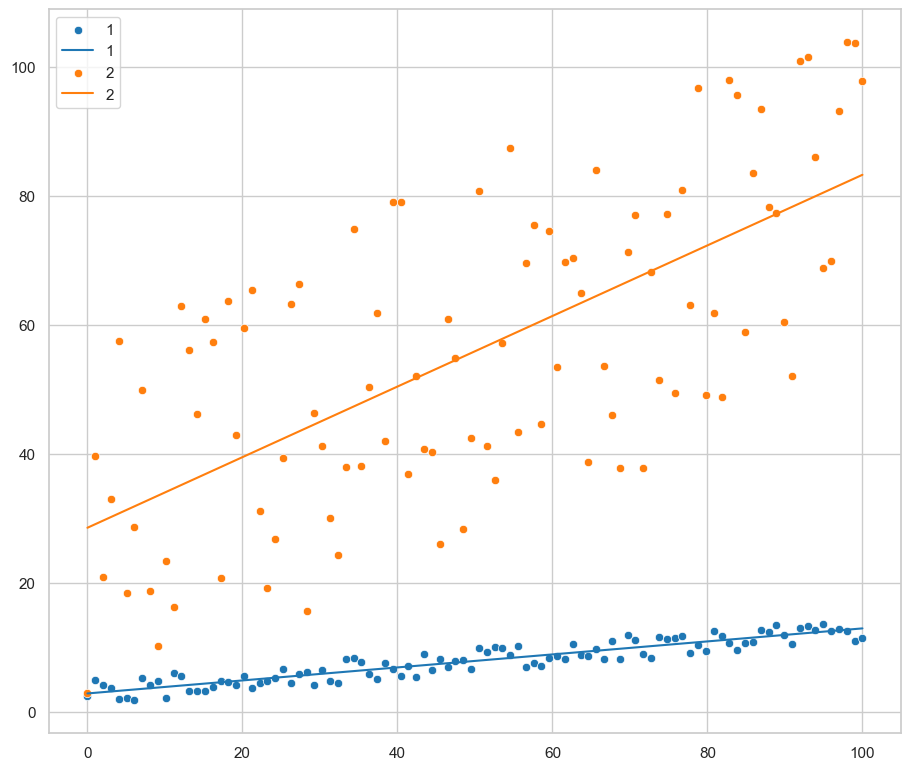

In [ ]:
# En la siguiente grafica podemos ver un poco mejor el slope o pendiente de las rectas.
# Con la cual confirmamos que los puntos naranjas tienen un mayor impacto.

sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 =  res_1.intercept + res_1.slope *  fx_1

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 =  res_2.intercept + res_2.slope *  fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])

LinregressResult(slope=-0.08232675339862285, intercept=20.786648668433827, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.01926834673577886, intercept_stderr=0.8541730787409801)


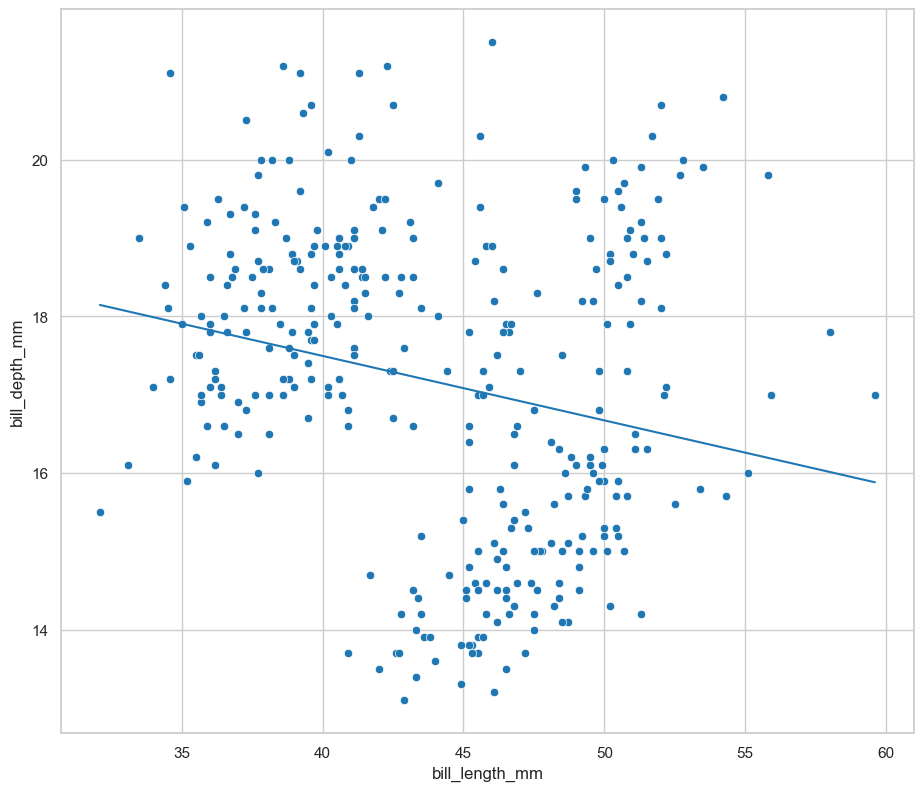

In [ ]:
# Si hacemos el ejercicio con las variables del ejercicio de los datos de pinguinos.
# Y podemos confirmar que entre bill_depth_mm y bill_lenght_mm 
# La correlación es negativa y el slope tambien es negativo

sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguins = scipy.stats.linregress(x=processed_penguins_df.bill_length_mm, y=processed_penguins_df.bill_depth_mm)
print(res_penguins)

fx_1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy_1 =  res_penguins.intercept + res_penguins.slope *  fx_1 # Ecuacion de la linea recta

plt.plot(fx_1, fy_1)

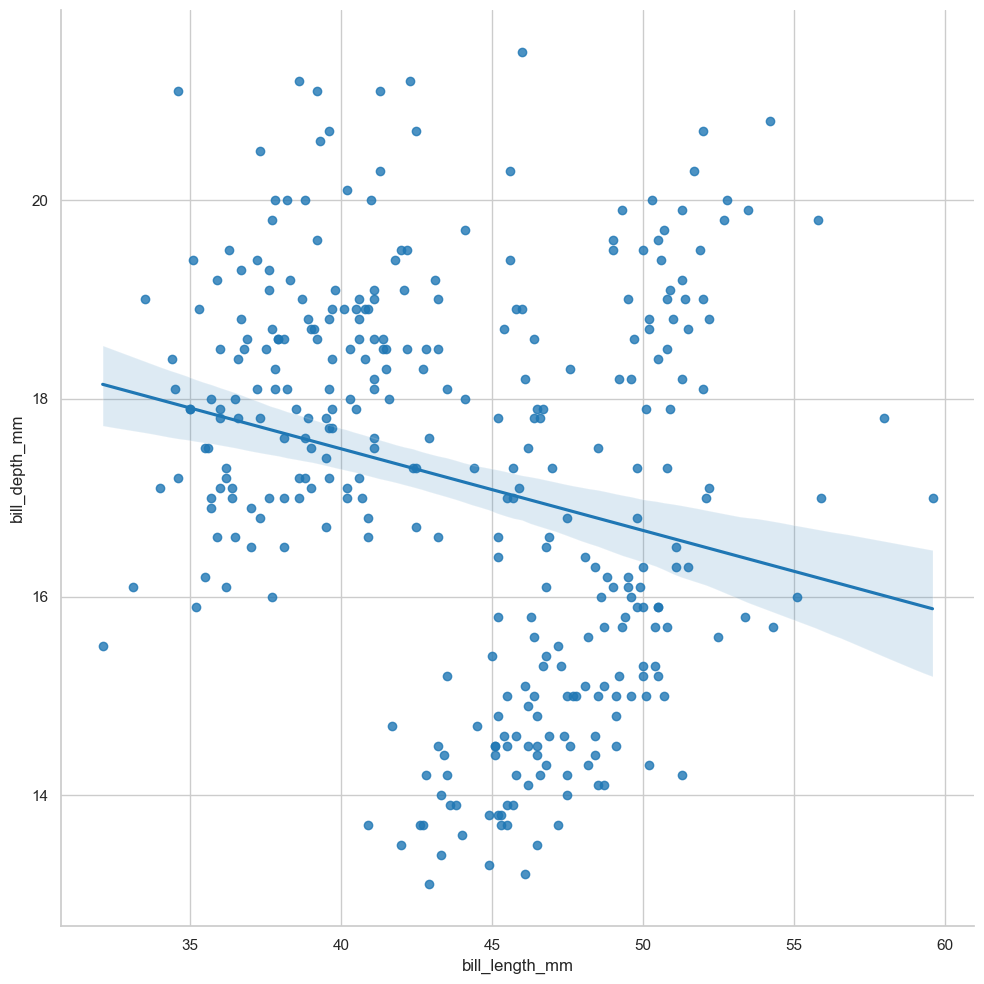

In [87]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

In [88]:
x = processed_penguins_df.bill_length_mm
y = processed_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(y=x, x=y)

print(res_x_y, res_y_x, sep="\n")

LinregressResult(slope=-0.08232675339862285, intercept=20.786648668433827, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.01926834673577886, intercept_stderr=0.8541730787409801)
LinregressResult(slope=-0.6349051704195029, intercept=54.89085424504756, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.14859778216623312, intercept_stderr=2.567341513538256)


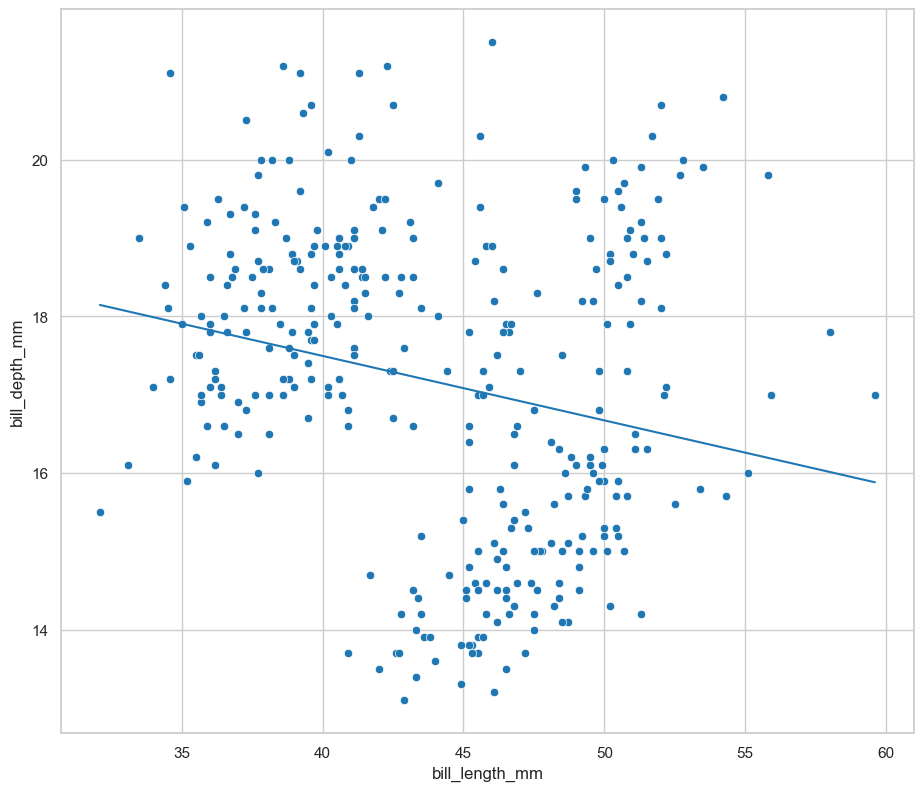

In [89]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 =  res_x_y.intercept + res_x_y.slope *  fx_1

plt.plot(fx_1, fy_1)

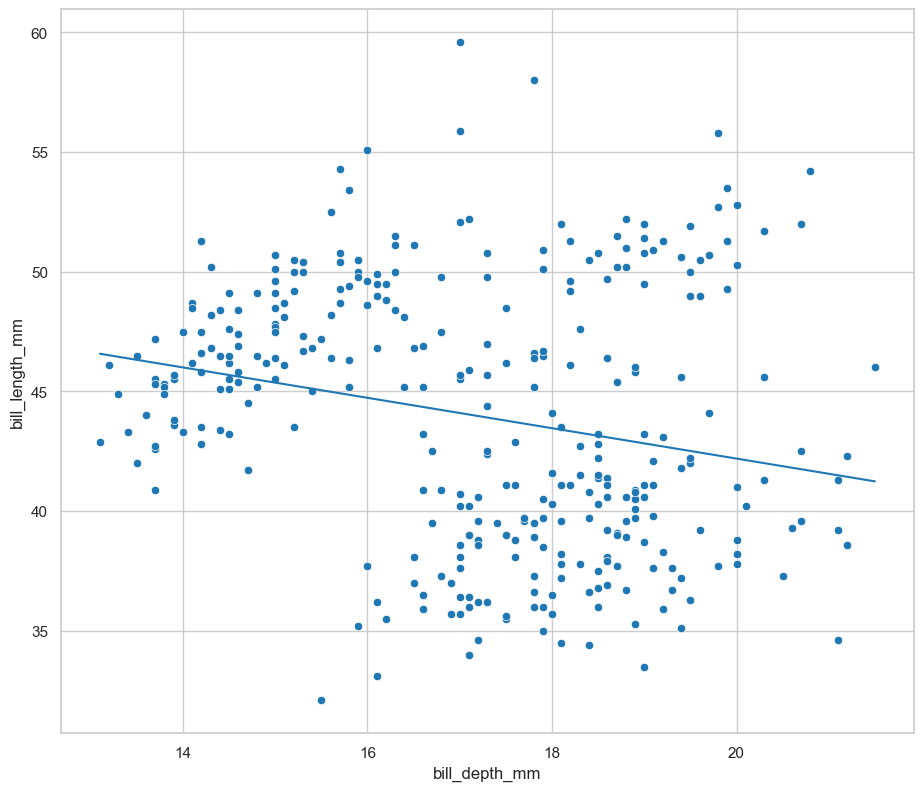

In [90]:
sns.scatterplot(
    x=y,
    y=x
)

fx_1 = np.array([y.min(), y.max()])
fy_1 =  res_y_x.intercept + res_y_x.slope *  fx_1

plt.plot(fx_1, fy_1)

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre varias variables

La pendiente es -0.634905, lo que significa que cada milímetro adicional de profundidad del pico es asociado a un decremento de -0.634905 milímetros de la longitud del pico de un pingüino.

In [91]:
(
    smf.ols(
        formula="bill_length_mm ~ bill_depth_mm",
         data=processed_penguins_df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [92]:
(
    smf.ols(
        formula="bill_depth_mm ~ bill_length_mm",
         data=processed_penguins_df
    )
    .fit()
    .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.26
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           2.53e-05
Time:                        07:33:58   Log-Likelihood:                -688.72
No. Observations:                 333   AIC:                             1381.
Df Residuals:                     331   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.7866      0.854     24.335      0.000      19.106      22.467
bill_length_mm    -0.0823      0.019     -4.273      0.000      -0.120      -0.044
==============================================================================
Omnibus:                       15.442   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.783
Skew:                          -0.014   Prob(JB):                       0.0337
Kurtosis:                       2.301   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿Cuál sería la mejor forma de capturar ese dato?

### Creando modelos

In [93]:
model_1 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm",
         data=processed_penguins_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           1.54e-32
Time:                        07:33:58   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
model_2 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm ",
         data=processed_penguins_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           7.04e-46
Time:                        07:33:58   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
model_3 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm",
         data=processed_penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          9.26e-103
Time:                        07:33:58   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
model_4 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)",
         data=processed_penguins_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          6.28e-122
Time:                        07:33:58   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.Male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
model_5 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + C(sex)",
         data=processed_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          3.53e-118
Time:                        07:33:59   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.Male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizando resultados

In [98]:
models_results = pd.DataFrame(
    dict(
        actual_value=processed_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=processed_penguins_df.species,
        sex=processed_penguins_df.sex
    )
)

models_results

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3441.323750,Adelie,Male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3328.384372,Adelie,Female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3751.223949,Adelie,Female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3657.259599,Adelie,Female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3864.163327,Adelie,Male
...,...,...,...,...,...,...,...,...
338,4925.0,4485.416214,4951.159375,4817.401804,4730.939522,4643.885279,Gentoo,Female
340,4850.0,4450.699510,4833.930015,4877.548625,4719.043886,4690.867454,Gentoo,Female
341,5750.0,4763.149845,4899.545411,5269.708799,5402.946434,5367.592935,Gentoo,Male
342,5200.0,4311.832695,4641.476223,4728.911846,4563.248182,4549.920929,Gentoo,Female


<AxesSubplot: ylabel='Proportion'>

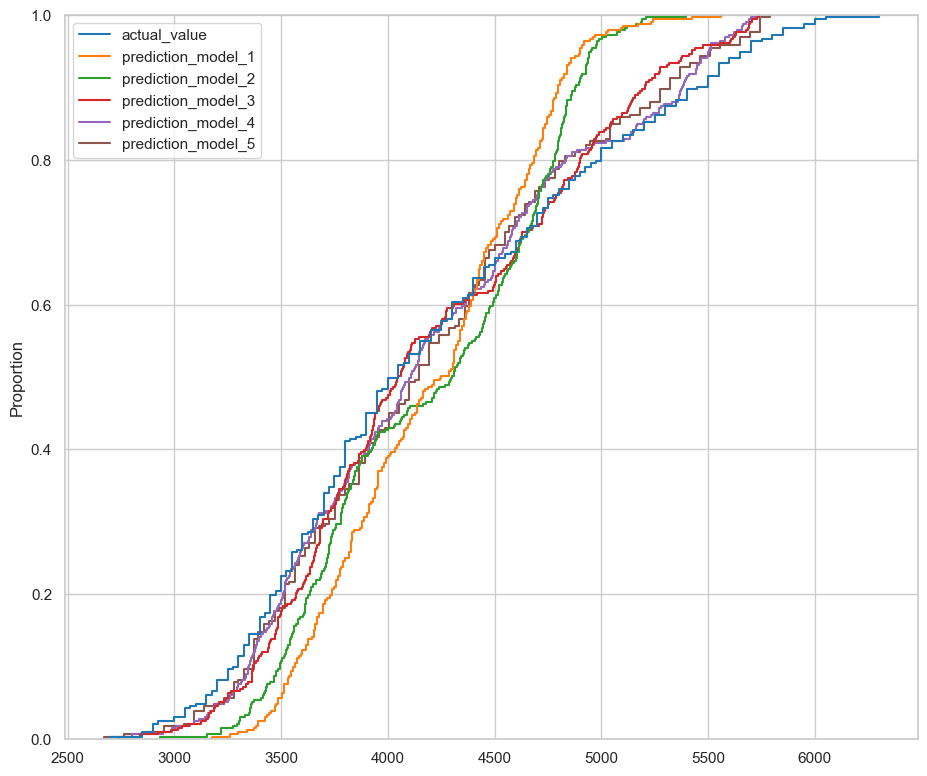

In [99]:
sns.ecdfplot(
    data=models_results#.select_columns(['actual_value', 'prediction_model_5'])
)

<AxesSubplot: ylabel='Density'>

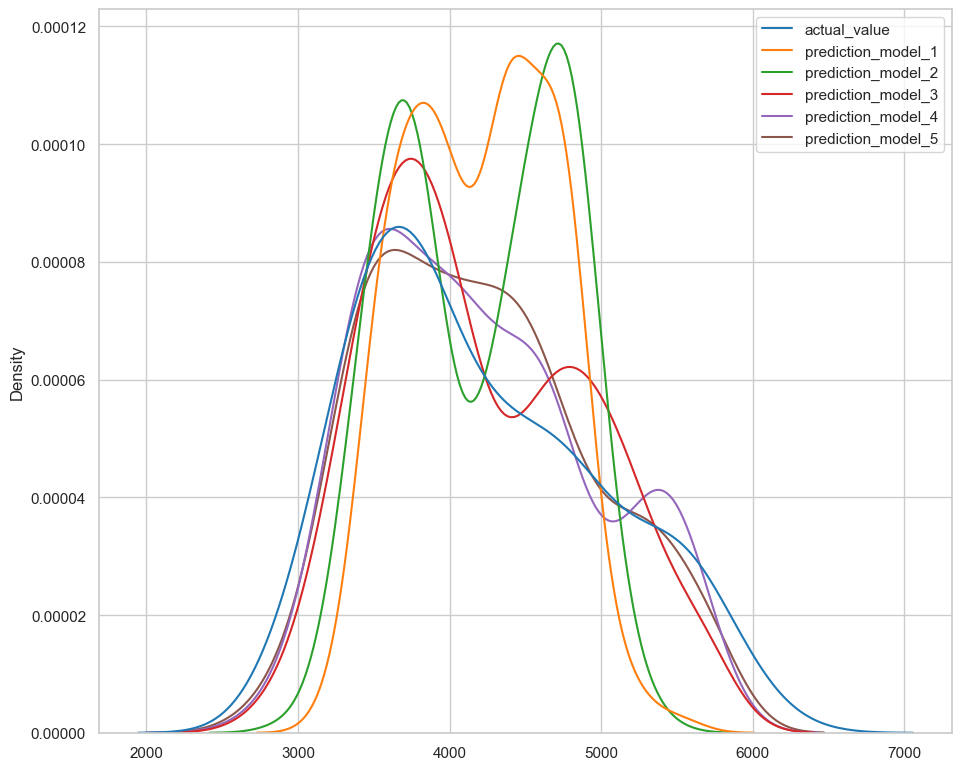

In [100]:
sns.kdeplot(
    data=models_results,
    cumulative=False
)

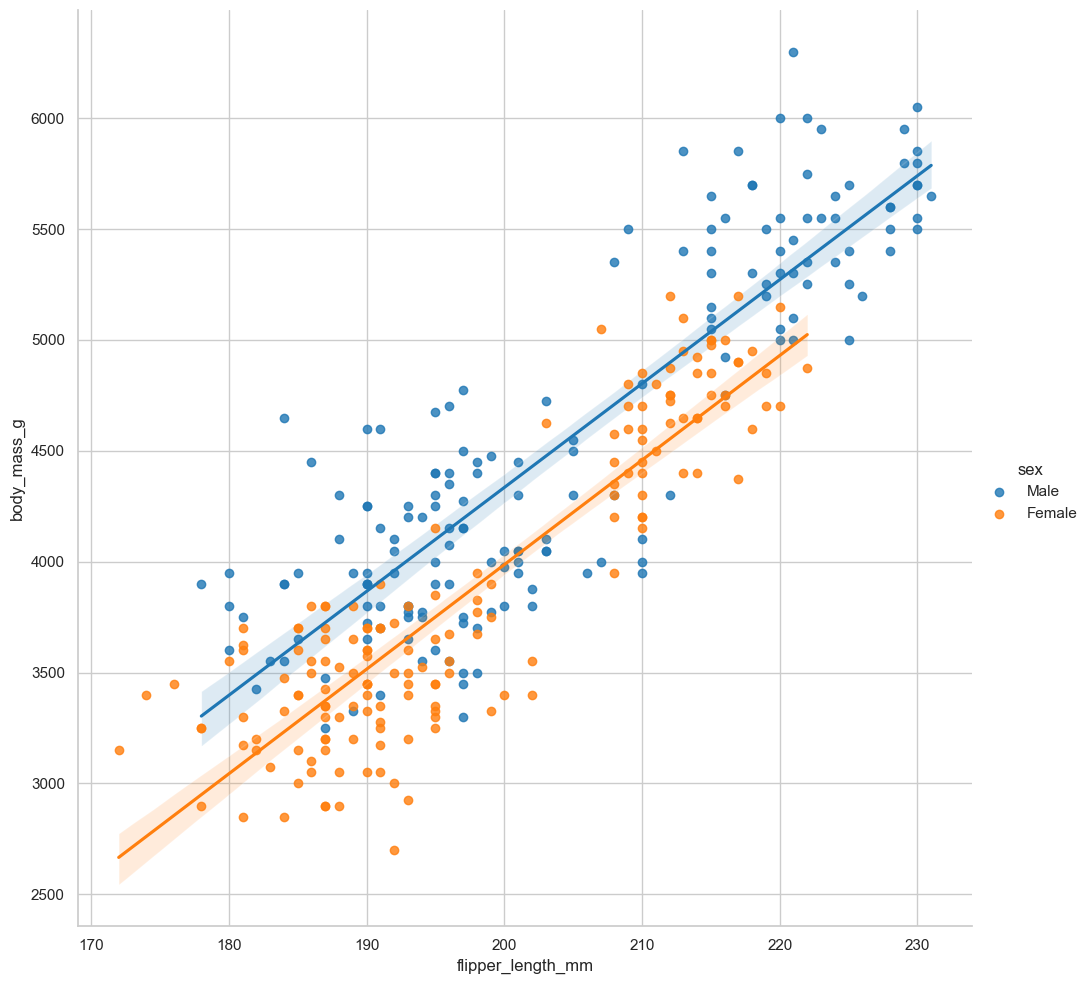

In [101]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    height=10,
    hue='sex'
)

# Análisis de regresión logística

In [102]:
smf.logit(
    formula='sex_numeric ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            sex_numeric   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Sat, 23 Nov 2024   Pseudo R-squ.:                  0.4793
Time:                        07:34:01   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [103]:
(
    processed_penguins_df
    .value_counts(['island', 'sex', 'species'])
    .reset_index(name='count')
)

,island,sex,species,count
0,Biscoe,Male,Gentoo,61
1,Biscoe,Female,Gentoo,58
2,Dream,Female,Chinstrap,34
3,Dream,Male,Chinstrap,34
4,Dream,Male,Adelie,28
5,Dream,Female,Adelie,27
6,Torgersen,Female,Adelie,24
7,Torgersen,Male,Adelie,23
8,Biscoe,Female,Adelie,22
9,Biscoe,Male,Adelie,22


In [104]:
processed_penguins_df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [105]:
processed_penguins_df = (
    processed_penguins_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1, 0, 0]))
)

In [106]:
model_is_adelie = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=processed_penguins_df
).fit(maxiter=100)

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.Male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [107]:
is_adelie_df_predictions = pd.DataFrame(
    dict(
        actual_adelie = processed_penguins_df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1, 0, 0]),
        predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_predictions

,actual_adelie,predicted_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
338,0,0.0
340,0,0.0
341,0,0.0
342,0,0.0


In [108]:
(
    is_adelie_df_predictions
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name='count')
    .pivot_wider(
        index='actual_adelie',
        names_from='predicted_values',
        values_from='count'
    )
    .rename_column('actual_adelie', 'actual / predicted')
)

,actual / predicted,0.0,1.0
0,0,151,36
1,1,17,129


In [109]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_values
)

[[151  36]
 [ 17 129]]


0.8408408408408409

# Paradoja de Simpson

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

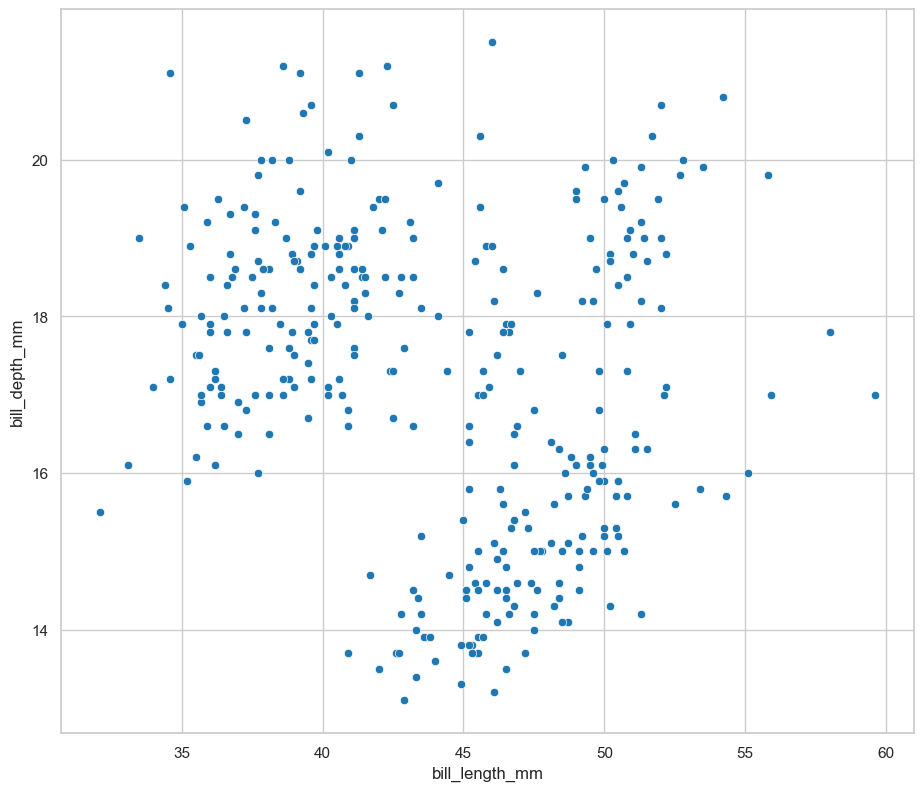

In [110]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

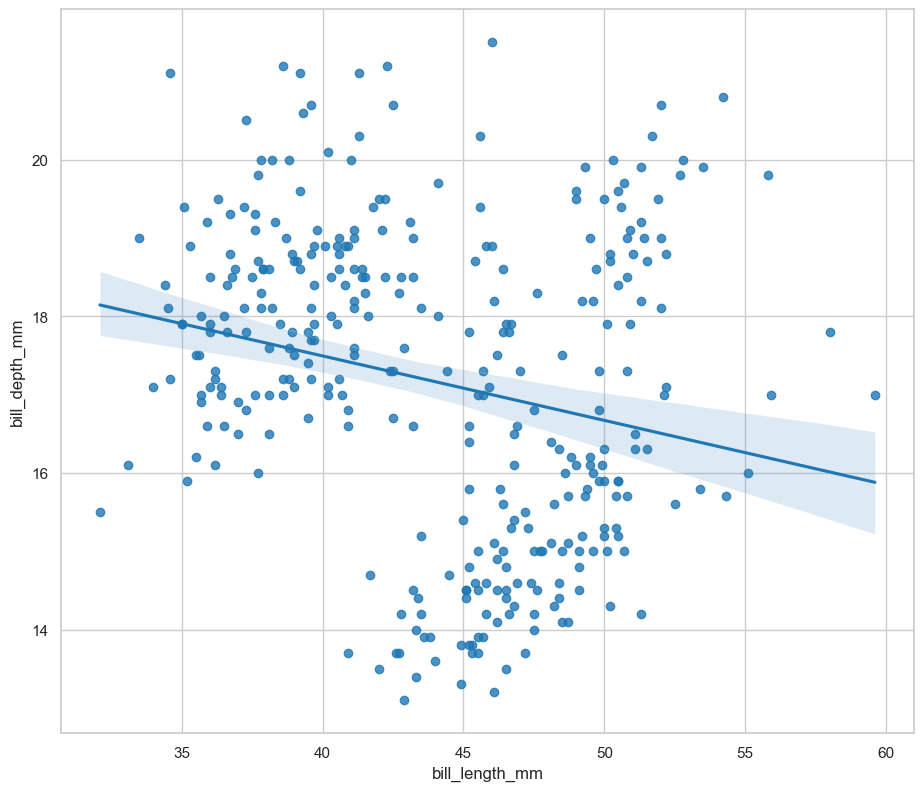

In [111]:
sns.regplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

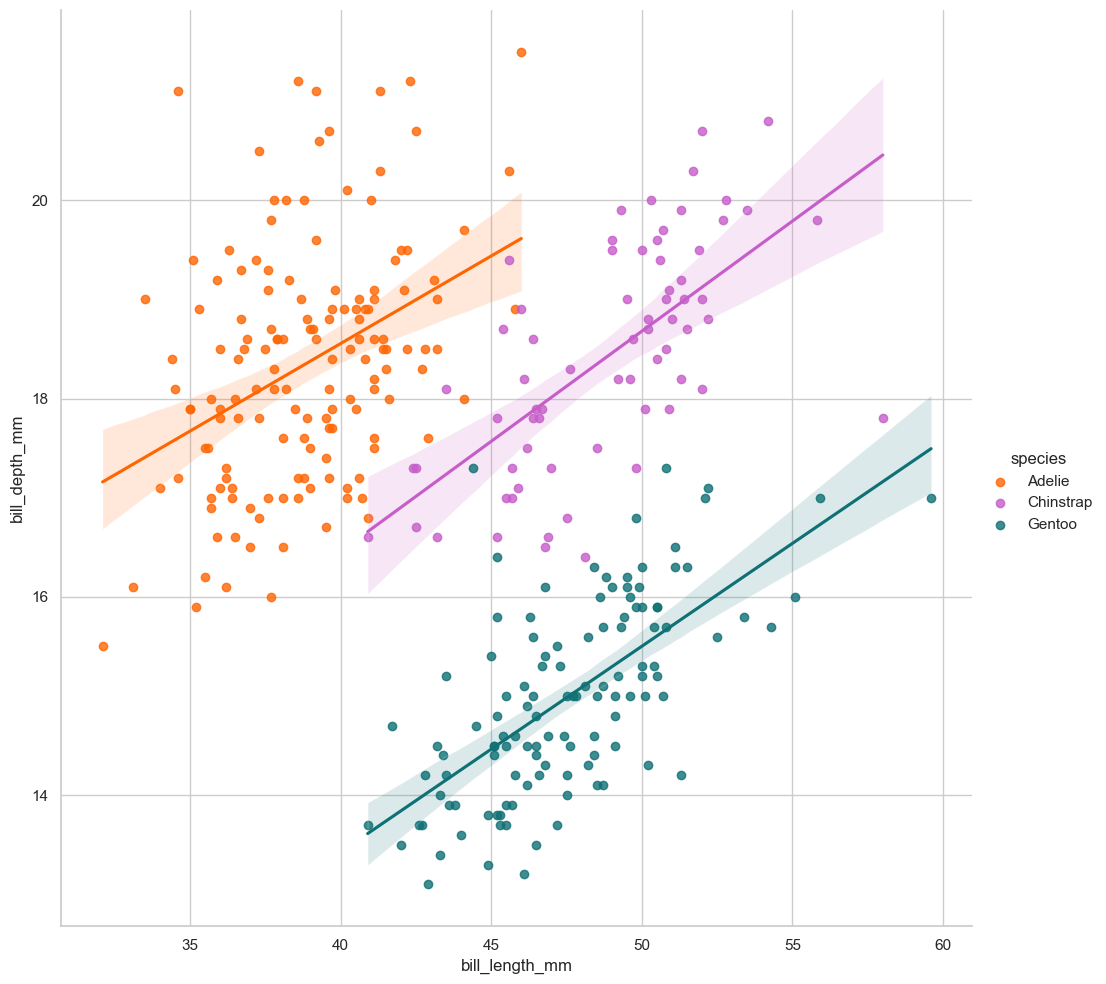

In [112]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10,
    palette=penguin_color
)

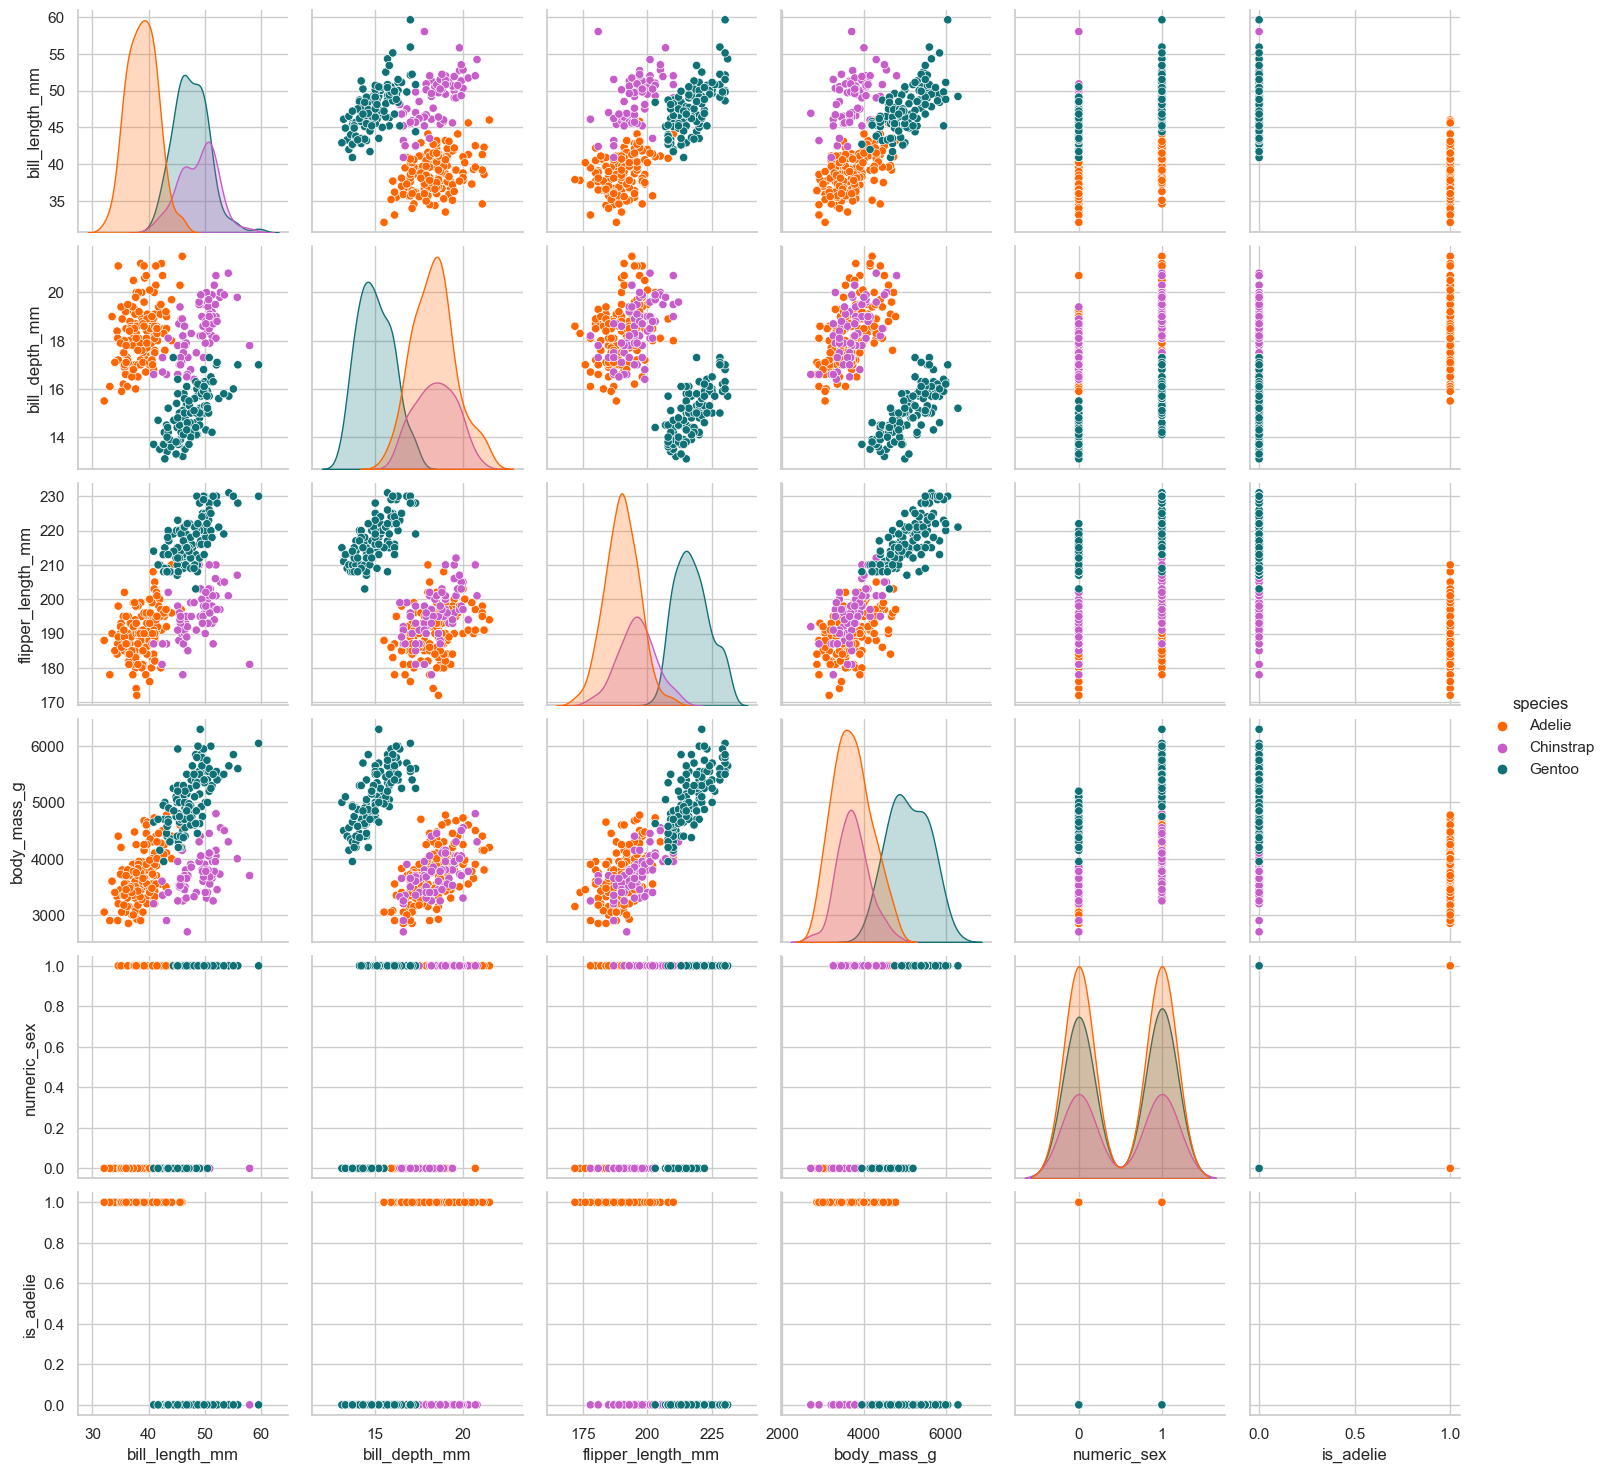

In [113]:
sns.pairplot(data=processed_penguins_df, hue='species', palette=penguin_color)

## Información de sesión

In [114]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=adabdf4b-8f79-4c9b-8d42-262d9d5eb097' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>